## Contexto del caso

### 1.1 Contexto de Negocio
RetailPlus es una empresa líder del sector minorista peruano con más de 20 años de experiencia, que opera tanto en el canal mayorista como minorista. La empresa atiende a una diversa cartera de clientes que incluye desde pequeñas bodegas hasta grandes industrias de sectores como alimentos, química, textiles y laboratorios.

### 1.2 Problemática
La empresa enfrenta desafíos en la optimización de rentabilidad debido a:
- Excesos de inventario y quiebres de stock
- Decisiones de precios subóptimas
- Gestión compleja de crédito y cobranza con condiciones de pago variables

### 1.3 Objetivo del Proyecto
Desarrollar un modelo predictivo de machine learning para predecir el **Monto USD** de las transacciones, utilizando variables como características del cliente, producto, condiciones de pago y ubicación geográfica. Este modelo permitirá a RetailPlus mejorar su planificación de ventas y optimizar su gestión comercial.

## Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de archivo

In [2]:
df=pd.read_csv("dataset_module2 (3).txt")
df.head()

FECHA_FACTURA  COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL  \
0    2020-01-02        10006        EMPRESA      ALIMENTO             1   
1    2020-01-02        10006        EMPRESA      ALIMENTO             2   
2    2020-01-02        10029        EMPRESA       QUIMICA             3   
3    2020-01-02        10099        EMPRESA      ALIMENTO             2   
4    2020-01-02        10146        EMPRESA        TEXTIL             3   

  COD_MARCA REGION PROVINCIA     DISTRITO CIUDAD CENTRO_DESPACHO  \
0         A   Lima      LIMA  LA VICTORIA   LIMA            PE23   
1         B   Lima      LIMA  LA VICTORIA   LIMA            PE22   
2         B   Lima      LIMA   SAN ISIDRO   LIMA            PE20   
3         B   Lima      LIMA          ATE   LIMA            PE22   
4         B   Lima      LIMA          ATE   LIMA            PE20   

      CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad   Flete  Monto USD  
0  Factura a 45 días  15142123            TO     31.01  280.33    1580.27  
1  Factura a 45 días  15142794            TO     11.00   51.04    1513.16  
2  Factura a 30 días  15137684            TO     10.00   46.43    1189.63  
3  Factura a 60 días  15142786            TO     10.00   46.43    1265.00  
4  Factura a 45 días  15141649            TO     20.00  106.72    1090.75

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60045 entries, 0 to 60044
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FECHA_FACTURA    60045 non-null  object 
 1   COD_CLIENTE      60045 non-null  int64  
 2   SECTOR_CLIENTE   59907 non-null  object 
 3   RUBRO_CLIENTE    59907 non-null  object 
 4   COD_MATERIAL     60045 non-null  int64  
 5   COD_MARCA        60045 non-null  object 
 6   REGION           60045 non-null  object 
 7   PROVINCIA        60045 non-null  object 
 8   DISTRITO         60045 non-null  object 
 9   CIUDAD           59907 non-null  object 
 10  CENTRO_DESPACHO  59929 non-null  object 
 11  CONDICION_PAGO   60045 non-null  object 
 12  FACTURA          60045 non-null  int64  
 13  UNIDAD_MEDIDA    60045 non-null  object 
 14  Cantidad         60045 non-null  float64
 15  Flete            60045 non-null  float64
 16  Monto USD        60045 non-null  float64
dtypes: float64(3

Notamos que hay valores nulos en la variable ciudad,centro de despacho , sector cliente y rubro cliente.

In [4]:
df.isnull().sum()

FECHA_FACTURA        0
COD_CLIENTE          0
SECTOR_CLIENTE     138
RUBRO_CLIENTE      138
COD_MATERIAL         0
COD_MARCA            0
REGION               0
PROVINCIA            0
DISTRITO             0
CIUDAD             138
CENTRO_DESPACHO    116
CONDICION_PAGO       0
FACTURA              0
UNIDAD_MEDIDA        0
Cantidad             0
Flete                0
Monto USD            0
dtype: int64

Aqui ya tenemos con exactitud los valores nulos de las respectivas variables, que analizaremos mas adelante. Aqui solo tenemos como primer vistazo esta informacion de los nulos

In [5]:
df.describe()

COD_CLIENTE  COD_MATERIAL       FACTURA      Cantidad         Flete  \
count  60045.000000  60045.000000  6.004500e+04  60045.000000  60045.000000   
mean   14213.228895     13.341944  2.264762e+07     14.910866    282.028602   
std     3294.270076     11.057650  1.555083e+07     13.206984    565.231552   
min    10001.000000      1.000000  1.512290e+07    -32.000000      0.000000   
25%    10322.000000      5.000000  1.515932e+07      2.500000      0.000000   
50%    15499.000000     11.000000  1.517706e+07     10.500000     51.530000   
75%    17210.000000     21.000000  1.519446e+07     30.000000    284.090000   
max    40045.000000     72.000000  5.503167e+07    210.000000  47568.710000   

          Monto USD  
count  60045.000000  
mean    2217.798506  
std     2748.585532  
min   -40312.900000  
25%      308.110000  
50%     1444.150000  
75%     4746.940000  
max    34568.880000

In [6]:
lista_cualitativa=list(df.select_dtypes(include=['object']).columns)

In [7]:
lista_cualitativa

['FECHA_FACTURA',
 'SECTOR_CLIENTE',
 'RUBRO_CLIENTE',
 'COD_MARCA',
 'REGION',
 'PROVINCIA',
 'DISTRITO',
 'CIUDAD',
 'CENTRO_DESPACHO',
 'CONDICION_PAGO',
 'UNIDAD_MEDIDA']

In [8]:
lista_cuantitativa=list(df.select_dtypes(exclude=['object']).columns)

In [9]:
lista_cuantitativa

['COD_CLIENTE', 'COD_MATERIAL', 'FACTURA', 'Cantidad', 'Flete', 'Monto USD']

In [10]:
for var in lista_cualitativa:
    print(f"{var} :{df[var].unique()}")
    print("")

FECHA_FACTURA :['2020-01-02' '2020-01-03' '2020-01-04' ... '2024-12-28' '2024-12-30'
 '2024-12-31']

SECTOR_CLIENTE :['EMPRESA' 'DISTRIBUIDOR' 'TRADICIONAL' 'MODERNO' nan 'DONACIÓN'
 'TRANSPORTE' 'CANASTAS']

RUBRO_CLIENTE :['ALIMENTO' 'QUIMICA' 'TEXTIL' 'OTROS SERVICIOS' 'LABORATORIO'
 'DISTRIBUIDOR' 'MAQUILA' 'BEBIDAS' 'BROKER' 'PECUARIO'
 'MINERALES NO METALICOS' 'PESCA' 'INDUSTRIA' 'AGRICOLA' 'MAYORISTA'
 'AASS' 'EMPRESA' 'PAPEL' 'COMERCIALIZADORAS' 'ENERGIA Y AGUA' nan
 'DONACIÓN' 'ESTADO' 'TRANSPORTE' 'MINERIA' 'CANASTAS']

COD_MARCA :['A' 'B' 'C' 'D' 'E' 'F']

REGION :['Lima' 'San Martin' 'Callao' 'Arequipa' 'Ucayali' 'Junin' 'Ancash'
 'Cajamarca' 'Ica' 'Cuzco' 'Ayacucho' 'Tacna' 'Apurimac' 'Huanuco'
 'La Libertad' 'Piura' 'Puno' 'Pasco' 'Madre de Dios' 'Loreto'
 'Lambayeque' 'Huancavelica']

PROVINCIA :['LIMA' 'SAN MARTIN' 'PROV. CONST. CALLAO' 'AREQUIPA' 'CORONEL PORTILLO'
 'HUANCAYO' 'CALLAO' 'BREÑA' 'HUARAZ' 'CAJAMARCA' 'ICA' 'CUSCO' 'HUAMANGA'
 'TACNA' 'HUAURA' 'ABANCAY' 'C

Observamos que en la variable Provincia hay LIMA y lima  y de la misma forma con varias provincias, de la misma forma con dsitrito, lo cual procederemos a tratar esos valores 

In [11]:
df["PROVINCIA"]=df["PROVINCIA"].apply(lambda x : x.upper())

In [12]:
df["DISTRITO"]=df["DISTRITO"].apply(lambda x : x.upper())

In [13]:
for var in lista_cualitativa:
    print(f"{var} :{df[var].unique()}")
    print("")

FECHA_FACTURA :['2020-01-02' '2020-01-03' '2020-01-04' ... '2024-12-28' '2024-12-30'
 '2024-12-31']

SECTOR_CLIENTE :['EMPRESA' 'DISTRIBUIDOR' 'TRADICIONAL' 'MODERNO' nan 'DONACIÓN'
 'TRANSPORTE' 'CANASTAS']

RUBRO_CLIENTE :['ALIMENTO' 'QUIMICA' 'TEXTIL' 'OTROS SERVICIOS' 'LABORATORIO'
 'DISTRIBUIDOR' 'MAQUILA' 'BEBIDAS' 'BROKER' 'PECUARIO'
 'MINERALES NO METALICOS' 'PESCA' 'INDUSTRIA' 'AGRICOLA' 'MAYORISTA'
 'AASS' 'EMPRESA' 'PAPEL' 'COMERCIALIZADORAS' 'ENERGIA Y AGUA' nan
 'DONACIÓN' 'ESTADO' 'TRANSPORTE' 'MINERIA' 'CANASTAS']

COD_MARCA :['A' 'B' 'C' 'D' 'E' 'F']

REGION :['Lima' 'San Martin' 'Callao' 'Arequipa' 'Ucayali' 'Junin' 'Ancash'
 'Cajamarca' 'Ica' 'Cuzco' 'Ayacucho' 'Tacna' 'Apurimac' 'Huanuco'
 'La Libertad' 'Piura' 'Puno' 'Pasco' 'Madre de Dios' 'Loreto'
 'Lambayeque' 'Huancavelica']

PROVINCIA :['LIMA' 'SAN MARTIN' 'PROV. CONST. CALLAO' 'AREQUIPA' 'CORONEL PORTILLO'
 'HUANCAYO' 'CALLAO' 'BREÑA' 'HUARAZ' 'CAJAMARCA' 'ICA' 'CUSCO' 'HUAMANGA'
 'TACNA' 'HUAURA' 'ABANCAY' 'C

Notamos que ya corregimos esta inconsistencia

In [14]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [FECHA_FACTURA, COD_CLIENTE, SECTOR_CLIENTE, RUBRO_CLIENTE, COD_MATERIAL, COD_MARCA, REGION, PROVINCIA, DISTRITO, CIUDAD, CENTRO_DESPACHO, CONDICION_PAGO, FACTURA, UNIDAD_MEDIDA, Cantidad, Flete, Monto USD]
Index: []

Por ultimo , notamos que no hay duplicados, entonces procederemos

In [15]:
df.shape

(60045, 17)

## EDA

Empezamos analizando por tipo de variable cualitativa o cuantitativo

### Analisis Univariado-- Variables Cuantitativas

### histogramas

In [16]:
lista_cuantitativa

['COD_CLIENTE', 'COD_MATERIAL', 'FACTURA', 'Cantidad', 'Flete', 'Monto USD']

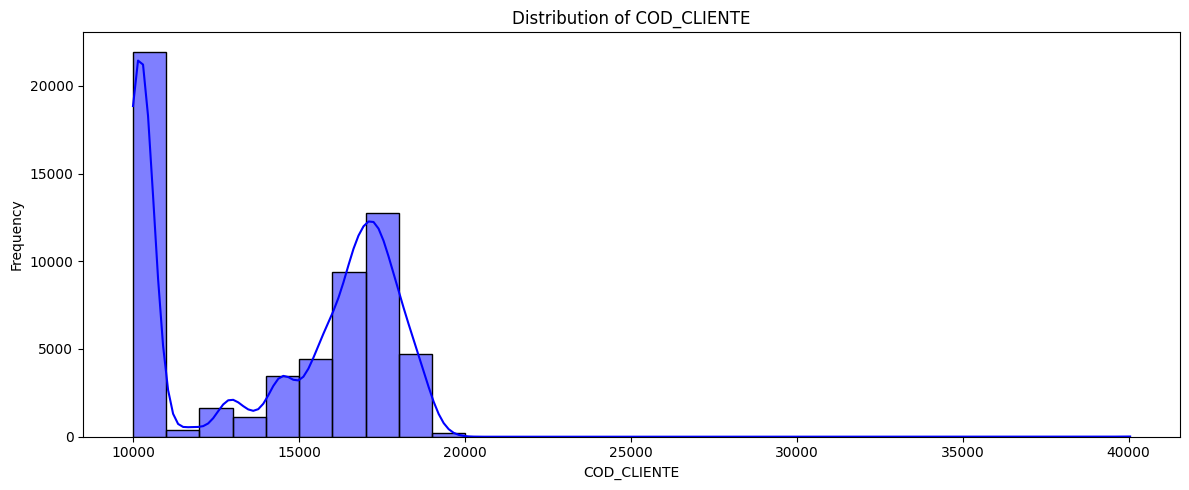

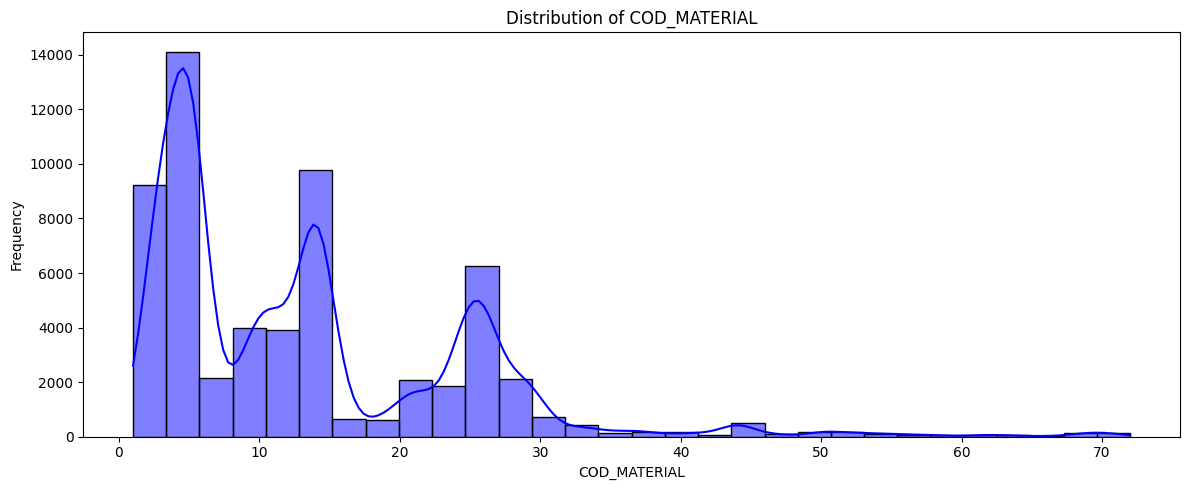

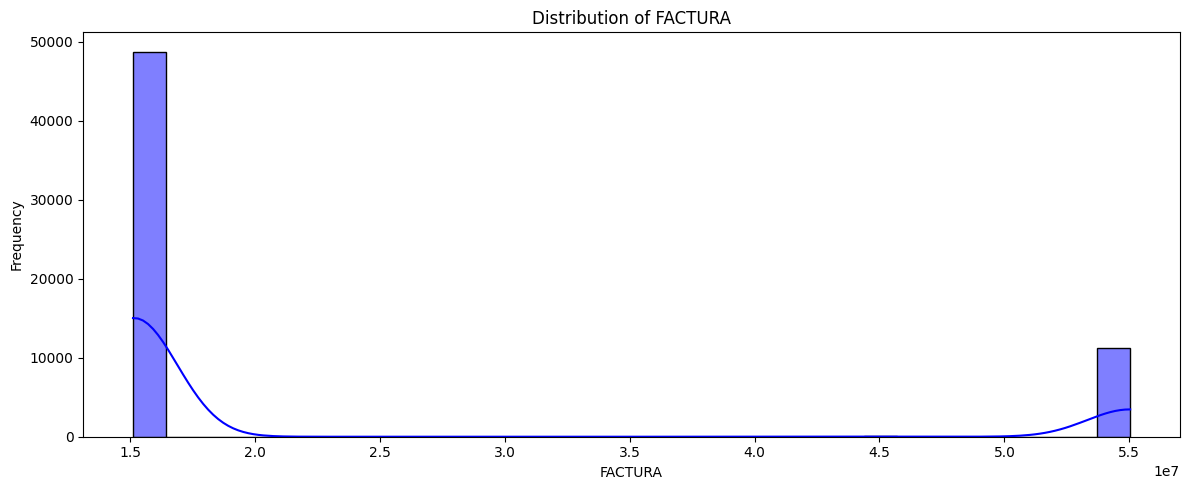

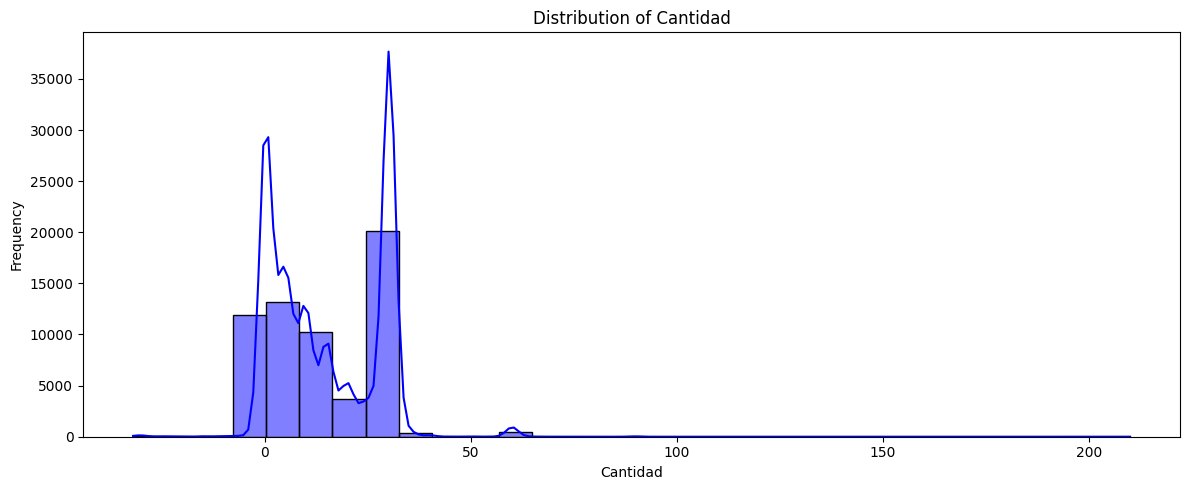

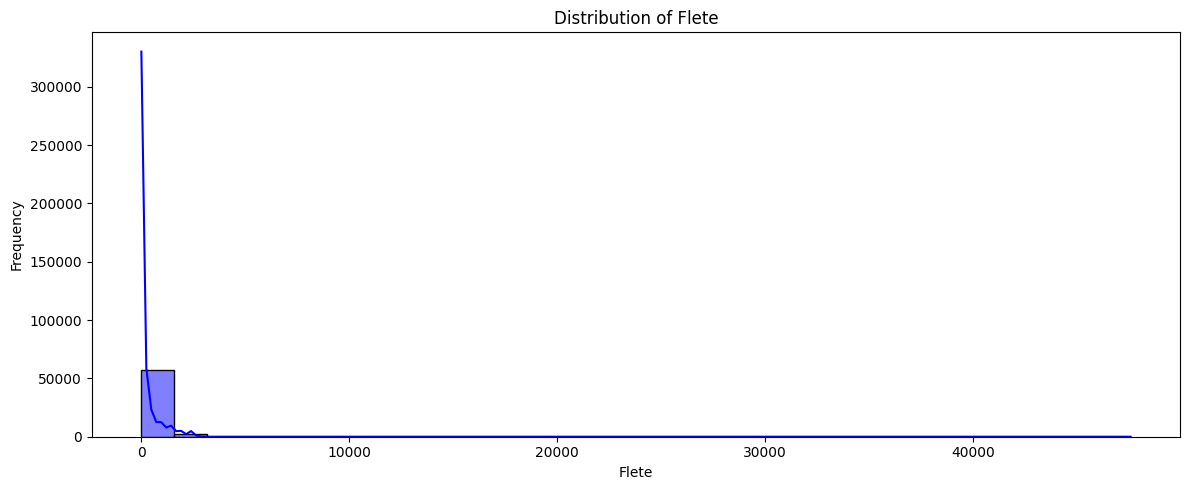

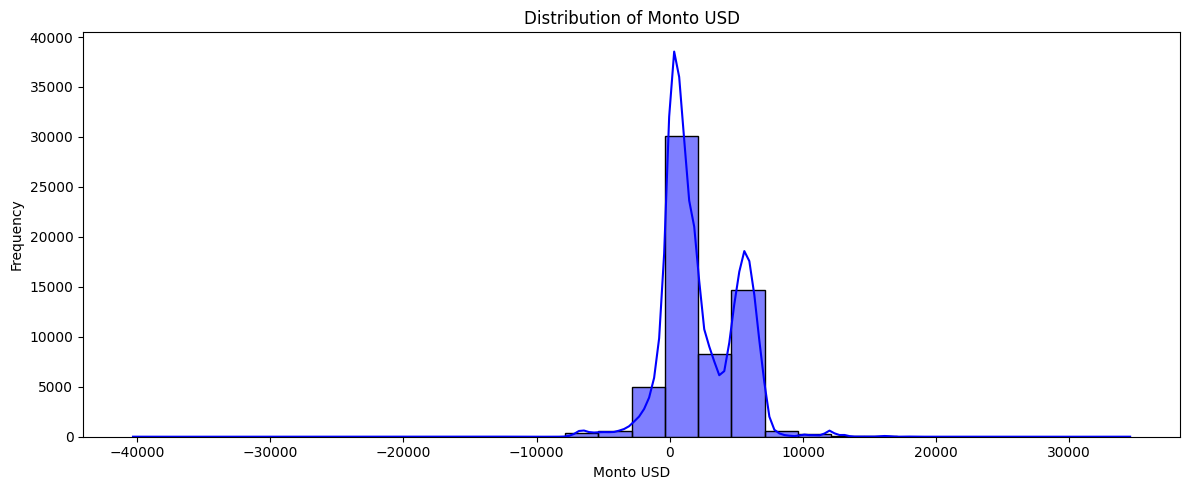

In [17]:
for i in lista_cuantitativa:
    plt.figure(figsize=(12, 5))
    sns.histplot(df[i], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### BOXPLOT

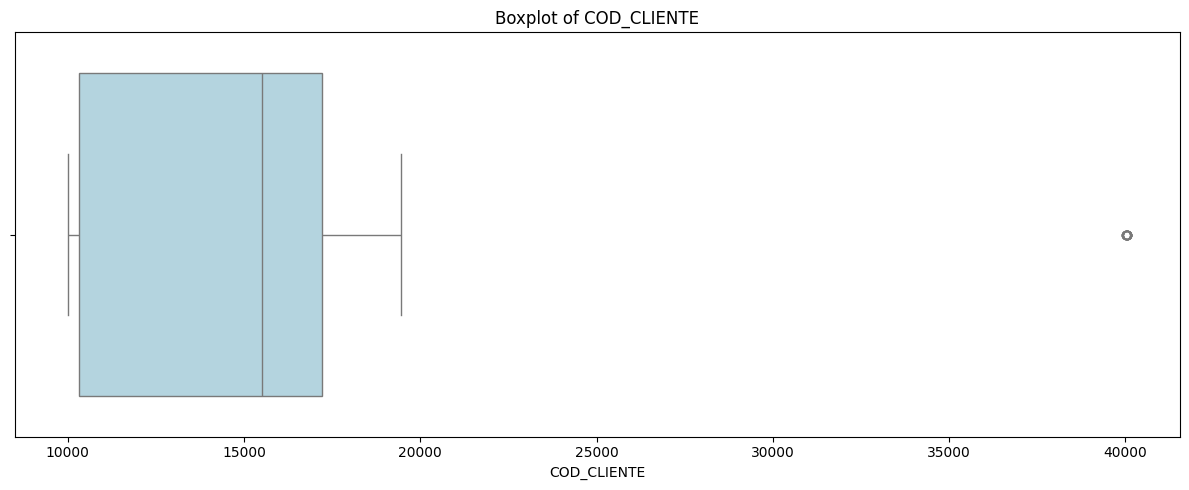

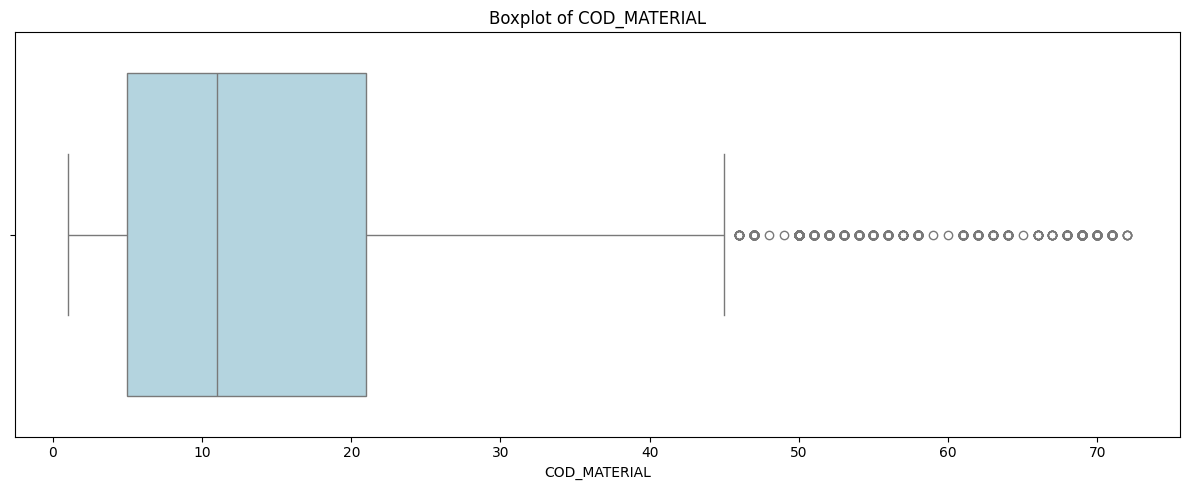

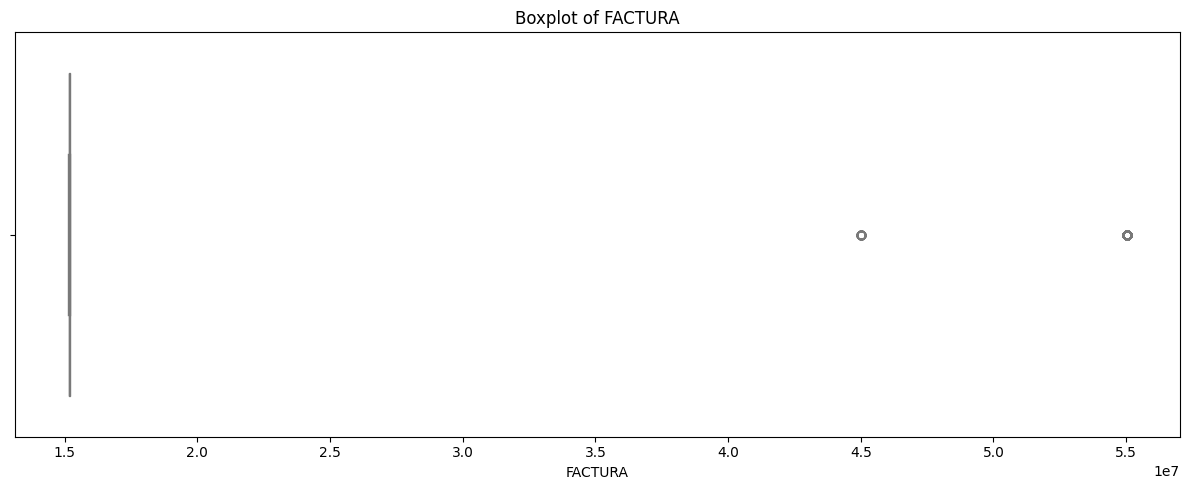

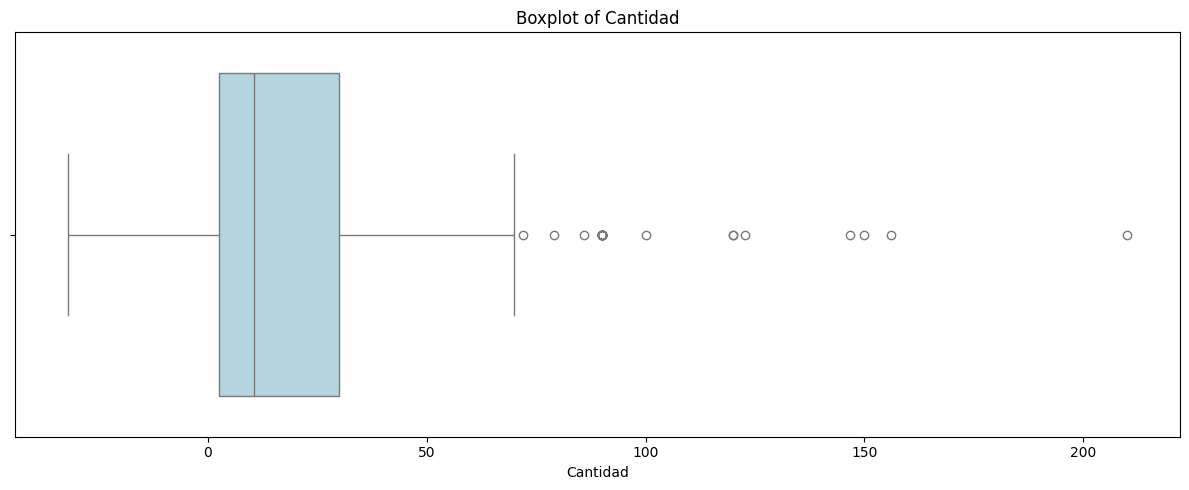

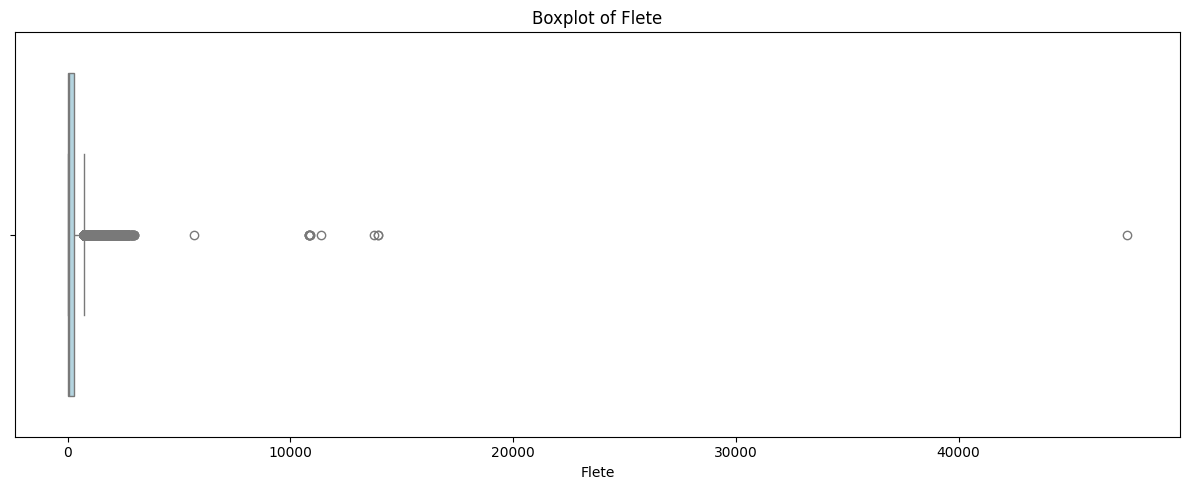

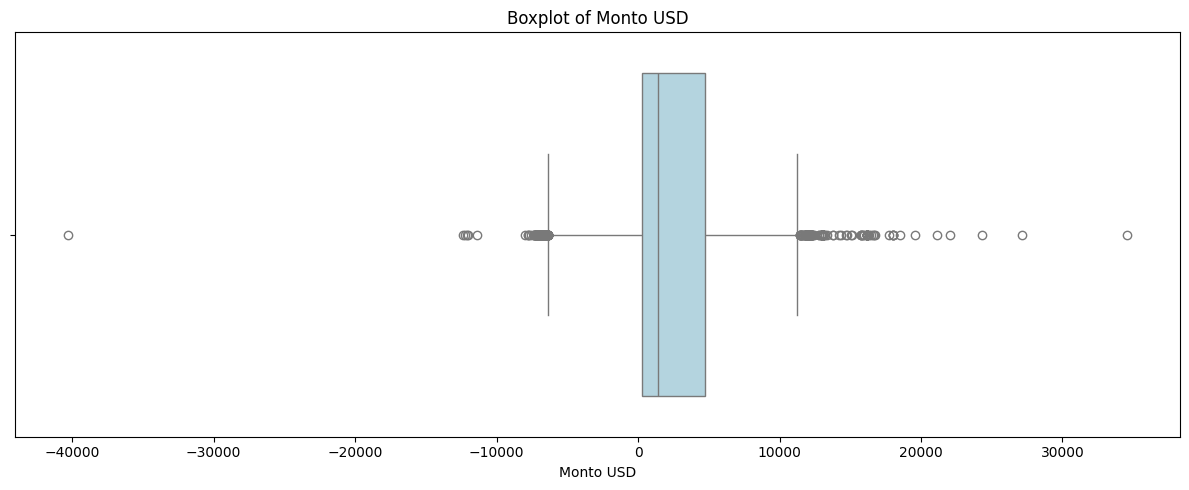

In [18]:
for i in lista_cuantitativa:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[i], color='lightblue')
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()

Comprobamos la presencia de valores negativos en la variable Monto USD y cantidad , y en flete notamos muchos valores 0. Vamos a analizarlo

In [19]:
df[df["Monto USD"]<0]

FECHA_FACTURA  COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL  \
83       2020-01-08        10015    TRADICIONAL        BROKER            15   
84       2020-01-08        10015    TRADICIONAL        BROKER            26   
94       2020-01-08        10244    TRADICIONAL  DISTRIBUIDOR             5   
95       2020-01-08        10244    TRADICIONAL  DISTRIBUIDOR             5   
96       2020-01-08        10284    TRADICIONAL        BROKER            14   
...             ...          ...            ...           ...           ...   
60040    2024-12-31        19324    TRADICIONAL  DISTRIBUIDOR            70   
60041    2024-12-31        19324    TRADICIONAL  DISTRIBUIDOR            70   
60042    2024-12-31        19350    TRADICIONAL  DISTRIBUIDOR            14   
60043    2024-12-31        19350    TRADICIONAL  DISTRIBUIDOR            14   
60044    2024-12-31        19425    TRADICIONAL        BROKER            14   

      COD_MARCA    REGION PROVINCIA              DISTRITO         CIUDAD  \
83            C      Lima      LIMA  SAN MARTIN DE PORRES   NORTE - TODO   
84            C      Lima      LIMA  SAN MARTIN DE PORRES   NORTE - TODO   
94            C  Arequipa  AREQUIPA              AREQUIPA       AREQUIPA   
95            C  Arequipa  AREQUIPA              AREQUIPA       AREQUIPA   
96            C      Lima      LIMA           LA VICTORIA  CENTRO - TODO   
...         ...       ...       ...                   ...            ...   
60040         C  Arequipa  CAYLLOMA                 MAJES       PEDREGAL   
60041         C  Arequipa  CAYLLOMA                 MAJES       PEDREGAL   
60042         C       Ica   CHINCHA          CHINCHA ALTA        CHINCHA   
60043         C       Ica   CHINCHA          CHINCHA ALTA        CHINCHA   
60044         C      Lima      LIMA     VILLA EL SALVADOR     SUR - TODO   

      CENTRO_DESPACHO     CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad  \
83               PE23  Factura a 15 días  55017194            TO       0.0   
84               PE23  Factura a 15 días  55017135            TO       0.0   
94               PE22  Factura a 15 días  55017148            TO       0.0   
95               PE23  Factura a 15 días  55017169            TO       0.0   
96               PE23  Factura a 21 días  55017170            TO       0.0   
...               ...                ...       ...           ...       ...   
60040            PE23            Contado  55031584            TO       0.0   
60041            PE23            Contado  55031627            TO       0.0   
60042            PE23            Contado  55031585            TO       0.0   
60043            PE23            Contado  55031624            TO       0.0   
60044            PE23            Contado  55031586            TO       0.0   

       Flete  Monto USD  
83       0.0   -3271.95  
84       0.0   -4259.57  
94       0.0   -3401.02  
95       0.0   -2613.81  
96       0.0    -145.21  
...      ...        ...  
60040    0.0    -221.44  
60041    0.0    -773.83  
60042    0.0    -442.89  
60043    0.0    -554.08  
60044    0.0    -223.02  

[10486 rows x 17 columns]

Notamos que en esos valores negativos , hay flete 0 y cantidad 0 .Analizaremos a mas profundidad

In [20]:
df[(df["Monto USD"]<0) & (df["Flete"]==0)]

FECHA_FACTURA  COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL  \
83       2020-01-08        10015    TRADICIONAL        BROKER            15   
84       2020-01-08        10015    TRADICIONAL        BROKER            26   
94       2020-01-08        10244    TRADICIONAL  DISTRIBUIDOR             5   
95       2020-01-08        10244    TRADICIONAL  DISTRIBUIDOR             5   
96       2020-01-08        10284    TRADICIONAL        BROKER            14   
...             ...          ...            ...           ...           ...   
60040    2024-12-31        19324    TRADICIONAL  DISTRIBUIDOR            70   
60041    2024-12-31        19324    TRADICIONAL  DISTRIBUIDOR            70   
60042    2024-12-31        19350    TRADICIONAL  DISTRIBUIDOR            14   
60043    2024-12-31        19350    TRADICIONAL  DISTRIBUIDOR            14   
60044    2024-12-31        19425    TRADICIONAL        BROKER            14   

      COD_MARCA    REGION PROVINCIA              DISTRITO         CIUDAD  \
83            C      Lima      LIMA  SAN MARTIN DE PORRES   NORTE - TODO   
84            C      Lima      LIMA  SAN MARTIN DE PORRES   NORTE - TODO   
94            C  Arequipa  AREQUIPA              AREQUIPA       AREQUIPA   
95            C  Arequipa  AREQUIPA              AREQUIPA       AREQUIPA   
96            C      Lima      LIMA           LA VICTORIA  CENTRO - TODO   
...         ...       ...       ...                   ...            ...   
60040         C  Arequipa  CAYLLOMA                 MAJES       PEDREGAL   
60041         C  Arequipa  CAYLLOMA                 MAJES       PEDREGAL   
60042         C       Ica   CHINCHA          CHINCHA ALTA        CHINCHA   
60043         C       Ica   CHINCHA          CHINCHA ALTA        CHINCHA   
60044         C      Lima      LIMA     VILLA EL SALVADOR     SUR - TODO   

      CENTRO_DESPACHO     CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad  \
83               PE23  Factura a 15 días  55017194            TO       0.0   
84               PE23  Factura a 15 días  55017135            TO       0.0   
94               PE22  Factura a 15 días  55017148            TO       0.0   
95               PE23  Factura a 15 días  55017169            TO       0.0   
96               PE23  Factura a 21 días  55017170            TO       0.0   
...               ...                ...       ...           ...       ...   
60040            PE23            Contado  55031584            TO       0.0   
60041            PE23            Contado  55031627            TO       0.0   
60042            PE23            Contado  55031585            TO       0.0   
60043            PE23            Contado  55031624            TO       0.0   
60044            PE23            Contado  55031586            TO       0.0   

       Flete  Monto USD  
83       0.0   -3271.95  
84       0.0   -4259.57  
94       0.0   -3401.02  
95       0.0   -2613.81  
96       0.0    -145.21  
...      ...        ...  
60040    0.0    -221.44  
60041    0.0    -773.83  
60042    0.0    -442.89  
60043    0.0    -554.08  
60044    0.0    -223.02  

[10041 rows x 17 columns]

notamos que la cantidad sigue siendo alto es decir hay una relacion de esos valores negativos

In [21]:
df[(df["Monto USD"]<0) & (df["Flete"]==0)& (df["Cantidad"]==0)]

FECHA_FACTURA  COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL  \
83       2020-01-08        10015    TRADICIONAL        BROKER            15   
84       2020-01-08        10015    TRADICIONAL        BROKER            26   
94       2020-01-08        10244    TRADICIONAL  DISTRIBUIDOR             5   
95       2020-01-08        10244    TRADICIONAL  DISTRIBUIDOR             5   
96       2020-01-08        10284    TRADICIONAL        BROKER            14   
...             ...          ...            ...           ...           ...   
60040    2024-12-31        19324    TRADICIONAL  DISTRIBUIDOR            70   
60041    2024-12-31        19324    TRADICIONAL  DISTRIBUIDOR            70   
60042    2024-12-31        19350    TRADICIONAL  DISTRIBUIDOR            14   
60043    2024-12-31        19350    TRADICIONAL  DISTRIBUIDOR            14   
60044    2024-12-31        19425    TRADICIONAL        BROKER            14   

      COD_MARCA    REGION PROVINCIA              DISTRITO         CIUDAD  \
83            C      Lima      LIMA  SAN MARTIN DE PORRES   NORTE - TODO   
84            C      Lima      LIMA  SAN MARTIN DE PORRES   NORTE - TODO   
94            C  Arequipa  AREQUIPA              AREQUIPA       AREQUIPA   
95            C  Arequipa  AREQUIPA              AREQUIPA       AREQUIPA   
96            C      Lima      LIMA           LA VICTORIA  CENTRO - TODO   
...         ...       ...       ...                   ...            ...   
60040         C  Arequipa  CAYLLOMA                 MAJES       PEDREGAL   
60041         C  Arequipa  CAYLLOMA                 MAJES       PEDREGAL   
60042         C       Ica   CHINCHA          CHINCHA ALTA        CHINCHA   
60043         C       Ica   CHINCHA          CHINCHA ALTA        CHINCHA   
60044         C      Lima      LIMA     VILLA EL SALVADOR     SUR - TODO   

      CENTRO_DESPACHO     CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad  \
83               PE23  Factura a 15 días  55017194            TO       0.0   
84               PE23  Factura a 15 días  55017135            TO       0.0   
94               PE22  Factura a 15 días  55017148            TO       0.0   
95               PE23  Factura a 15 días  55017169            TO       0.0   
96               PE23  Factura a 21 días  55017170            TO       0.0   
...               ...                ...       ...           ...       ...   
60040            PE23            Contado  55031584            TO       0.0   
60041            PE23            Contado  55031627            TO       0.0   
60042            PE23            Contado  55031585            TO       0.0   
60043            PE23            Contado  55031624            TO       0.0   
60044            PE23            Contado  55031586            TO       0.0   

       Flete  Monto USD  
83       0.0   -3271.95  
84       0.0   -4259.57  
94       0.0   -3401.02  
95       0.0   -2613.81  
96       0.0    -145.21  
...      ...        ...  
60040    0.0    -221.44  
60041    0.0    -773.83  
60042    0.0    -442.89  
60043    0.0    -554.08  
60044    0.0    -223.02  

[10001 rows x 17 columns]

Llegamso a la conslusion que estos pedidos , forman parte de una devolucion de pedido , por lo tanto procederemos a eliminarlos del dataset, ya que no contribuiran de manera efectiva al modelo

In [22]:
df=df[(df["Monto USD"]>=0) & (df["Flete"]!=0)& (df["Cantidad"]!=0)]

In [23]:
df[df["Cantidad"]<0]

FECHA_FACTURA  COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL  \
48723    2024-02-13        16093    TRADICIONAL  DISTRIBUIDOR            14   
48726    2024-02-13        16093    TRADICIONAL  DISTRIBUIDOR             5   
48995    2024-02-21        10322        MODERNO  DISTRIBUIDOR            24   

      COD_MARCA REGION PROVINCIA   DISTRITO         CIUDAD CENTRO_DESPACHO  \
48723         C   Lima      LIMA      COMAS  LIMA - CENTRO            PE23   
48726         C   Lima      LIMA      COMAS  LIMA - CENTRO            PE23   
48995         C   Lima      LIMA  SURQUILLO           LIMA            PE22   

          CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad  Flete  Monto USD  
48723  Factura a 30 días  55028259            TO    -0.025  15.54       9.27  
48726  Factura a 30 días  55028259            TO    -0.025  15.54       9.27  
48995            Contado  55028282            TO    -0.025   9.03       3.32

Analizamos que hay otro error en ese caso de cantidad negativa, solo son 3 casos, lo obtamos por eliminar

In [24]:
df=df[df["Cantidad"]>=0]

Una vez acabado el tratamiento de datos anomalos , procederemos a graficar nuevamente

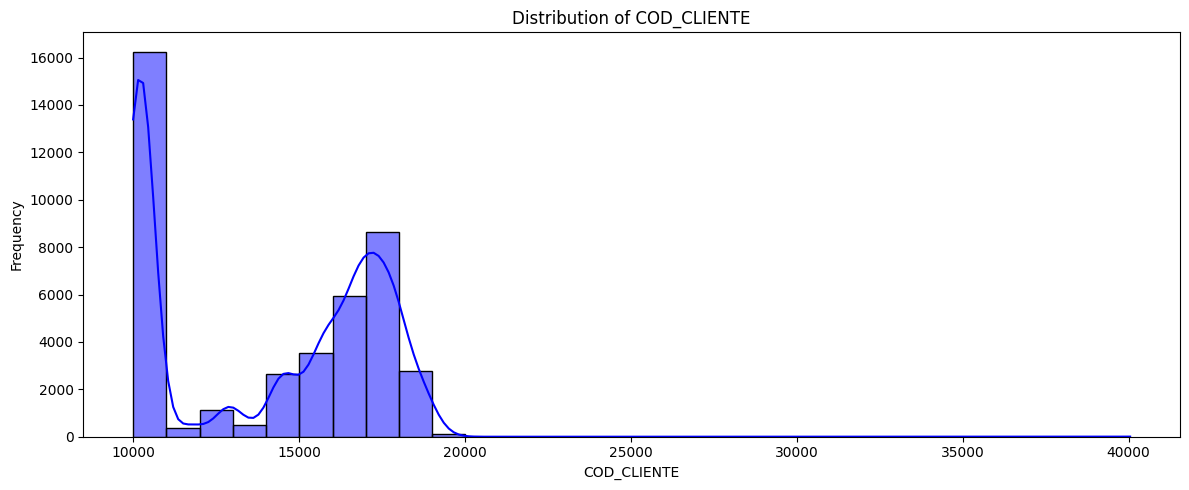

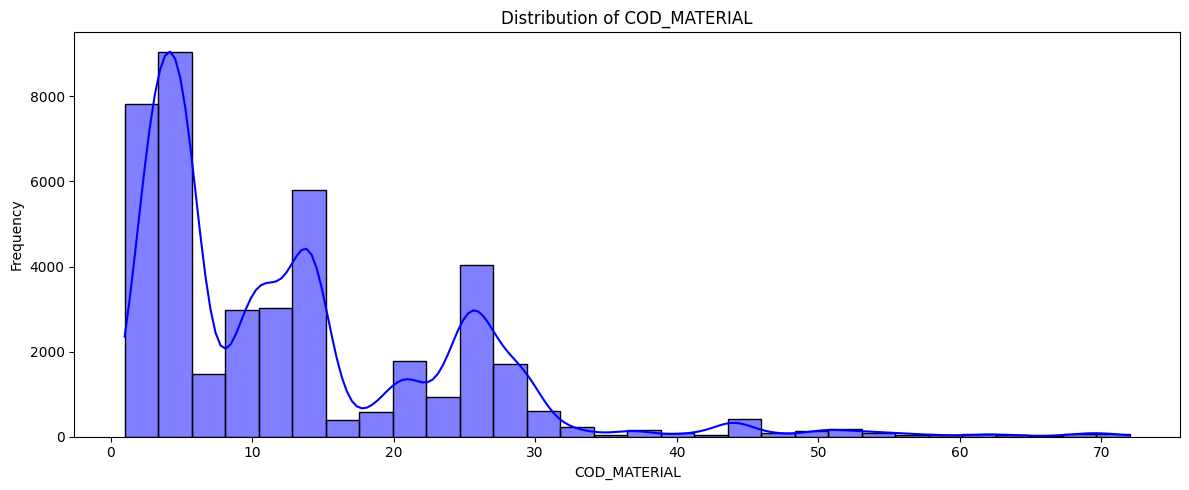

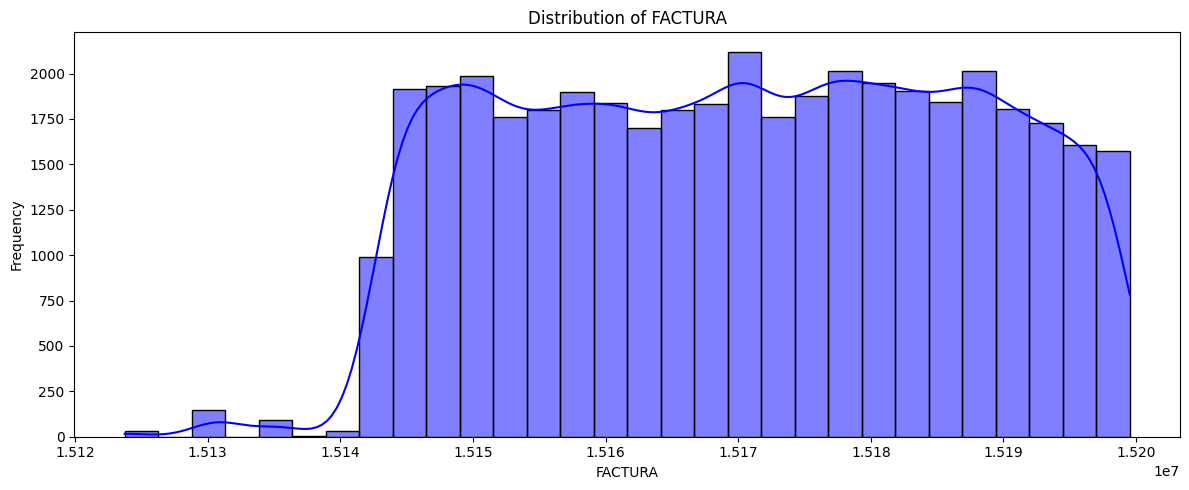

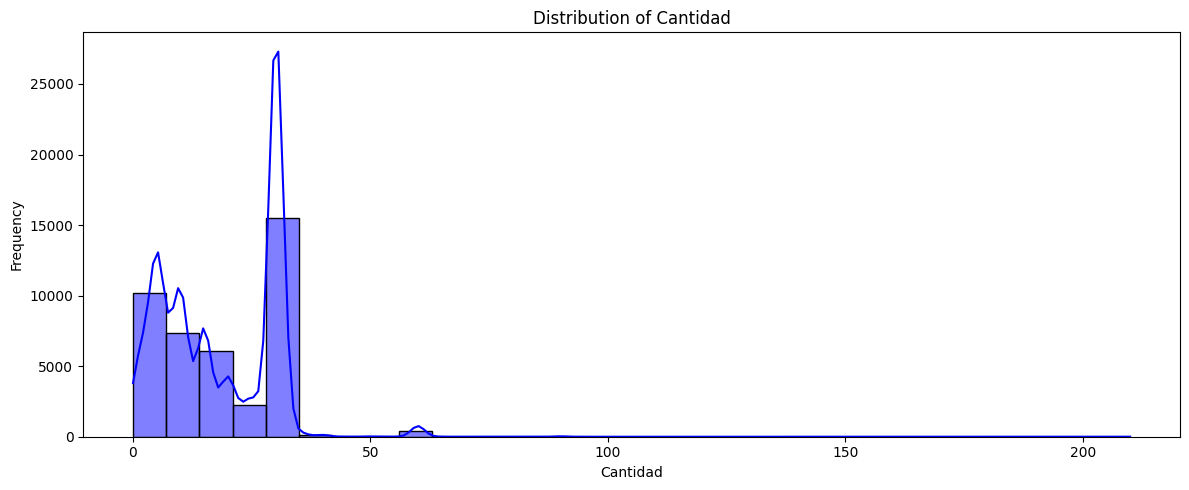

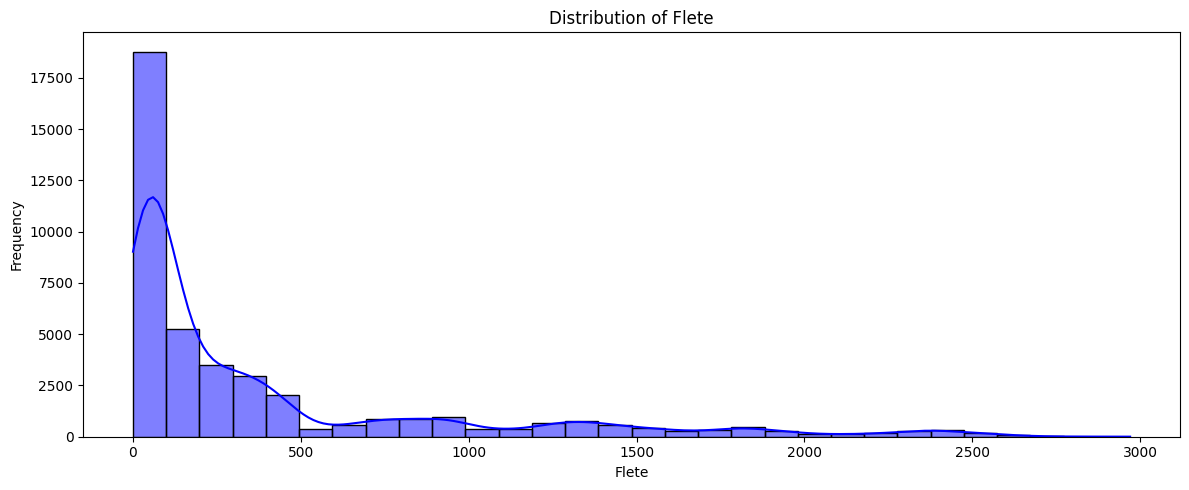

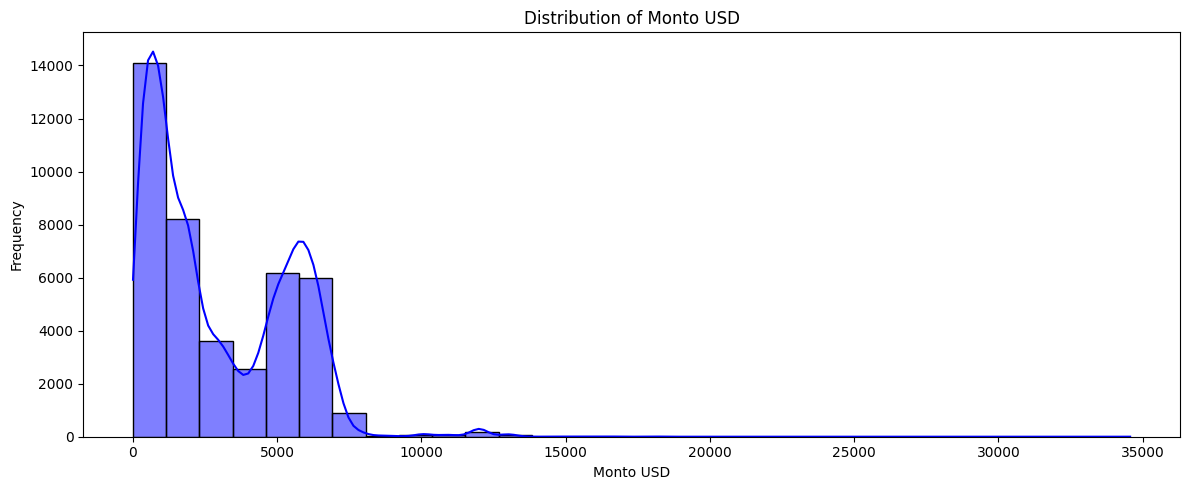

In [26]:
for i in lista_cuantitativa:
    plt.figure(figsize=(12, 5))
    sns.histplot(df[i], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Si bien hemos tratado los valores negativos, ahora tenemos que tratar los valores positivos extremos que podrian confundir al modelo

In [27]:
df[df["Monto USD"]>=df["Monto USD"].quantile(0.999) ].head(10)

FECHA_FACTURA  COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL  \
984      2020-01-31        17414    TRADICIONAL  DISTRIBUIDOR            28   
1084     2020-02-05        17414    TRADICIONAL  DISTRIBUIDOR            26   
1363     2020-02-12        17414    TRADICIONAL  DISTRIBUIDOR            26   
4710     2020-05-27        11470        EMPRESA        ESTADO            14   
6552     2020-07-30        11470        EMPRESA        ESTADO            14   
6787     2020-08-07        11470        EMPRESA        ESTADO            14   
6932     2020-08-13        11470        EMPRESA        ESTADO            14   
7204     2020-08-21        11470        EMPRESA        ESTADO            14   
7749     2020-09-08        11470        EMPRESA        ESTADO            14   
12098    2021-01-25        10006        EMPRESA      ALIMENTO             6   

      COD_MARCA   REGION         PROVINCIA     DISTRITO   CIUDAD  \
984           C  Ucayali  CORONEL PORTILLO     CALLERIA  HUÁNUCO   
1084          C  Ucayali  CORONEL PORTILLO     CALLERIA  HUÁNUCO   
1363          C  Ucayali  CORONEL PORTILLO     CALLERIA  HUÁNUCO   
4710          C     Lima              LIMA   SAN ISIDRO     LIMA   
6552          C     Lima              LIMA   SAN ISIDRO     LIMA   
6787          C     Lima              LIMA   SAN ISIDRO     LIMA   
6932          C     Lima              LIMA   SAN ISIDRO     LIMA   
7204          C     Lima              LIMA   SAN ISIDRO     LIMA   
7749          C     Lima              LIMA   SAN ISIDRO     LIMA   
12098         B     Lima              LIMA  LA VICTORIA     LIMA   

      CENTRO_DESPACHO         CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  \
984              PE23                Contado  15143570            TO   
1084             PE23                Contado  15143695            TO   
1363             PE23                Contado  15143697            TO   
4710             PE23  Sin Condición de Pago  15146396            TO   
6552             PE23      Factura a 21 días  15147993            TO   
6787             PE23      Factura a 21 días  15148454            TO   
6932             PE23      Factura a 21 días  15148454            TO   
7204             PE23      Factura a 21 días  15148454            TO   
7749             PE23      Factura a 21 días  15149187            TO   
12098            PE22      Factura a 45 días  15152858            TO   

       Cantidad    Flete  Monto USD  
984      150.00  2232.15   14214.30  
1084     156.00  2318.65   21135.56  
1363      62.40   920.36   13330.97  
4710      66.00   834.73   14677.01  
6552      90.00  1408.26   16770.97  
6787      90.00  1395.15   16614.99  
6932     120.00  1849.77   22029.15  
7204      90.00  1384.23   16484.91  
7749     146.75  2280.02   27152.88  
12098     90.00   379.80   15099.30

In [28]:
df[df["Flete"]>=df["Flete"].quantile(0.999) ].head(10)

FECHA_FACTURA  COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL  \
252     2020-01-10        16600    TRADICIONAL  DISTRIBUIDOR            26   
469     2020-01-16        16600    TRADICIONAL  DISTRIBUIDOR            25   
503     2020-01-17        16600    TRADICIONAL  DISTRIBUIDOR            25   
504     2020-01-17        16600    TRADICIONAL  DISTRIBUIDOR            25   
534     2020-01-18        16600    TRADICIONAL  DISTRIBUIDOR            25   
619     2020-01-22        15535    TRADICIONAL  DISTRIBUIDOR            26   
1826    2020-02-26        16600    TRADICIONAL  DISTRIBUIDOR            26   
2210    2020-02-29        16600    TRADICIONAL  DISTRIBUIDOR            26   
2765    2020-03-14        16600    TRADICIONAL  DISTRIBUIDOR            25   
4396    2020-05-14        16600    TRADICIONAL  DISTRIBUIDOR             5   

     COD_MARCA REGION PROVINCIA DISTRITO CIUDAD CENTRO_DESPACHO  \
252          C  Tacna     TACNA    TACNA    ILO            PE22   
469          C  Tacna     TACNA    TACNA    ILO            PE23   
503          C  Tacna     TACNA    TACNA    ILO            PE23   
504          C  Tacna     TACNA    TACNA    ILO            PE23   
534          C  Tacna     TACNA    TACNA    ILO            PE23   
619          C  Cuzco     CUSCO  WANCHAQ  CUSCO            PE22   
1826         C  Tacna     TACNA    TACNA    ILO            PE23   
2210         C  Tacna     TACNA    TACNA    ILO            PE23   
2765         C  Tacna     TACNA    TACNA    ILO            PE23   
4396         C  Tacna     TACNA    TACNA    ILO            PE23   

         CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad    Flete  Monto USD  
252   Factura a 15 días  15142976            TO    31.200  2636.73    4636.98  
469   Factura a 15 días  15143154            TO    31.200  2694.53    4566.07  
503   Factura a 15 días  15143132            TO    31.200  2861.10    4401.68  
504   Factura a 15 días  15143156            TO    31.200  2695.34    4567.44  
534   Factura a 15 días  15143155            TO    30.576  2643.02    4478.79  
619    Factura a 7 días  15143302            TO    31.200  2706.51    4569.39  
1826  Factura a 15 días  15144367            TO    29.640  2654.98    4084.58  
2210  Factura a 15 días  15144369            TO    30.680  2711.50    4171.55  
2765  Factura a 15 días  15144745            TO    30.758  2657.56    4088.56  
4396  Factura a 15 días  15146162            TO    30.000  2662.21    4366.01

In [29]:
df[df["Cantidad"]>=df["Cantidad"].quantile(0.999) ].head(10)

FECHA_FACTURA  COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL  \
519     2020-01-18        10322        MODERNO  DISTRIBUIDOR            14   
638     2020-01-23        10322        MODERNO  DISTRIBUIDOR             5   
749     2020-01-27        10006        EMPRESA      ALIMENTO             6   
791     2020-01-28        10322        MODERNO  DISTRIBUIDOR             5   
883     2020-01-30        10322        MODERNO  DISTRIBUIDOR            14   
984     2020-01-31        17414    TRADICIONAL  DISTRIBUIDOR            28   
985     2020-01-31        17414    TRADICIONAL  DISTRIBUIDOR            37   
1025    2020-02-04        10006        EMPRESA      ALIMENTO             6   
1084    2020-02-05        17414    TRADICIONAL  DISTRIBUIDOR            26   
1152    2020-02-07        17414    TRADICIONAL  DISTRIBUIDOR            37   

     COD_MARCA   REGION         PROVINCIA     DISTRITO   CIUDAD  \
519          C     Lima              LIMA    SURQUILLO     LIMA   
638          C     Lima              LIMA    SURQUILLO     LIMA   
749          B     Lima              LIMA  LA VICTORIA     LIMA   
791          C     Lima              LIMA    SURQUILLO     LIMA   
883          C     Lima              LIMA    SURQUILLO     LIMA   
984          C  Ucayali  CORONEL PORTILLO     CALLERIA  HUÁNUCO   
985          C  Ucayali  CORONEL PORTILLO     CALLERIA  HUÁNUCO   
1025         B     Lima              LIMA  LA VICTORIA     LIMA   
1084         C  Ucayali  CORONEL PORTILLO     CALLERIA  HUÁNUCO   
1152         C  Ucayali  CORONEL PORTILLO     CALLERIA  HUÁNUCO   

     CENTRO_DESPACHO     CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad  \
519             PE23            Contado  15143225            TO      60.0   
638             PE23            Contado  15143343            TO      60.0   
749             PE22  Factura a 45 días  15142797            TO      60.0   
791             PE22  Factura a 30 días  15143478            TO      60.0   
883             PE23            Contado  15143551            TO      60.0   
984             PE23            Contado  15143570            TO     150.0   
985             PE23            Contado  15143571            TO      90.0   
1025            PE22  Factura a 45 días  15143487            TO      60.0   
1084            PE23            Contado  15143695            TO     156.0   
1152            PE23            Contado  15143694            TO      90.0   

        Flete  Monto USD  
519    902.52   11812.28  
638    904.44   11837.20  
749    277.80   10041.60  
791    628.94   12028.74  
883    896.86   11738.12  
984   2232.15   14214.30  
985   1339.28    8528.57  
1025   273.60   10045.80  
1084  2318.65   21135.56  
1152  1334.92    8500.74

Notamos que son valores reales, estos no se tendrian que eliminar , sin embargo tendriamos que ajustarlo mediante una transformacion , que en este caso nos apoyamos de la logaritmica

In [30]:
df['MontoUSD_log'] = np.log1p(df['Monto USD'])
df['Flete_log'] = np.log1p(df['Flete'])
df['Cantidad_log'] = np.log1p(df['Cantidad'])

In [31]:
lista_log_cuantitativo=["MontoUSD_log","Flete_log","Cantidad_log"]

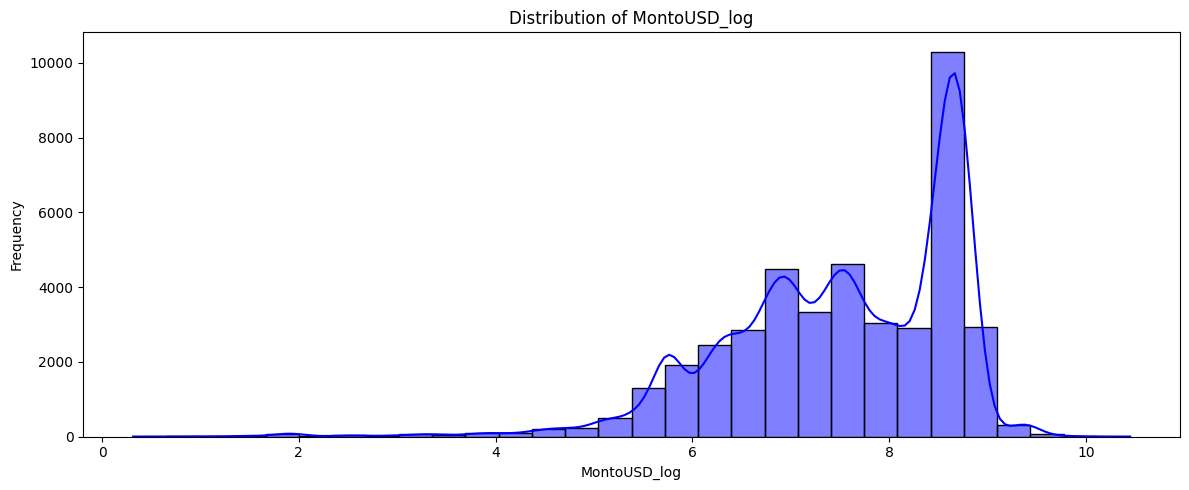

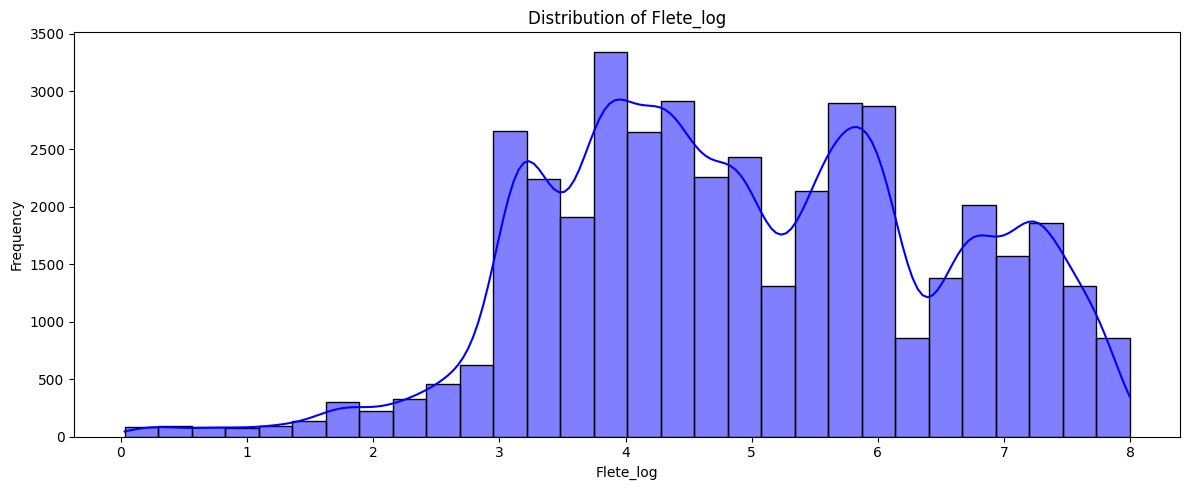

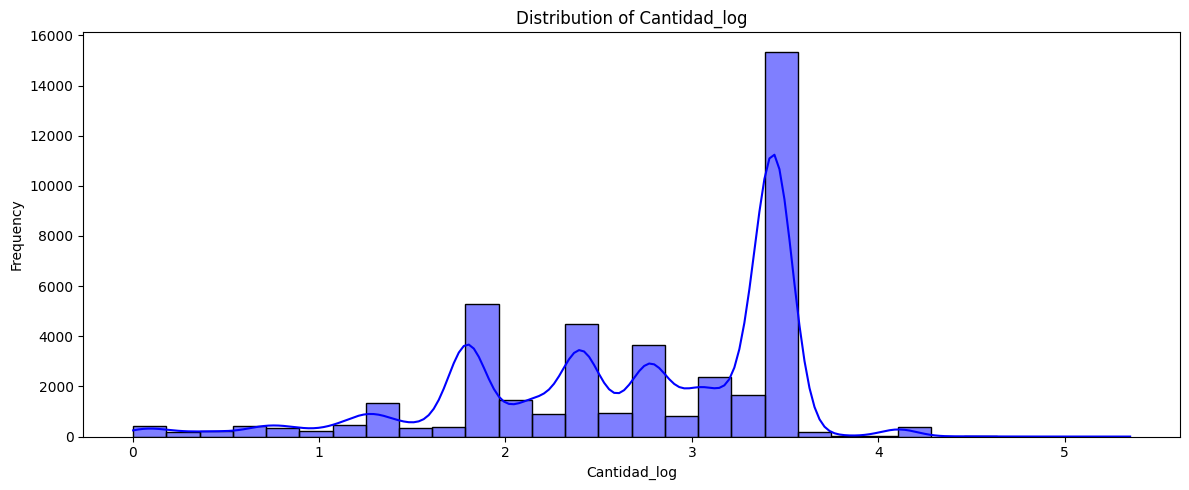

In [32]:
for i in lista_log_cuantitativo:
    plt.figure(figsize=(12, 5))
    sns.histplot(df[i], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

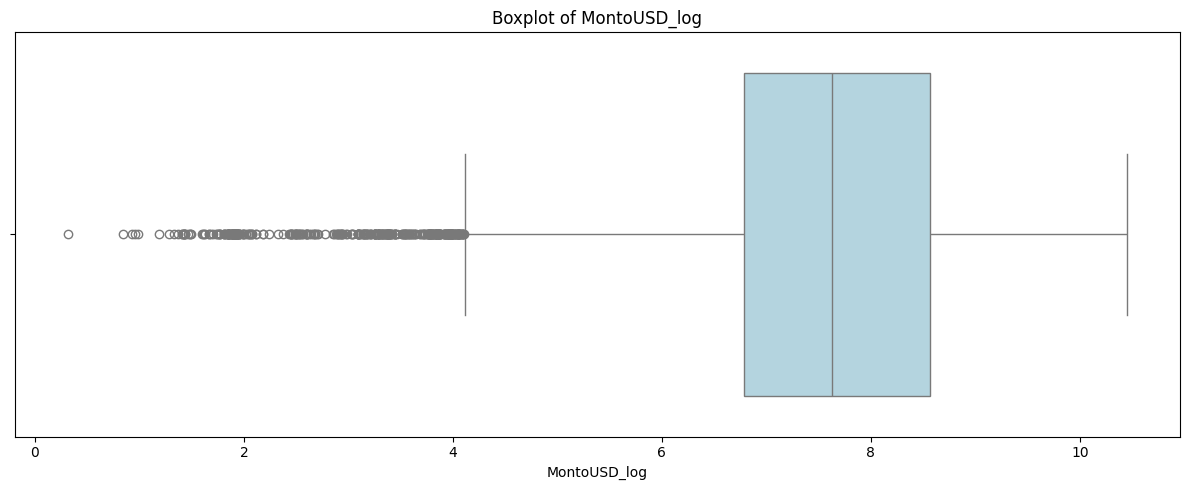

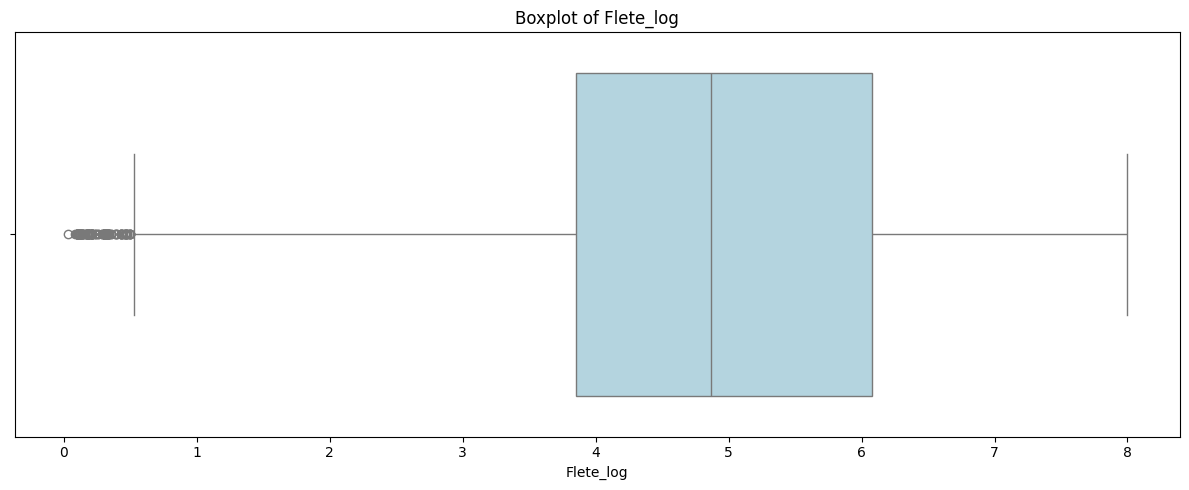

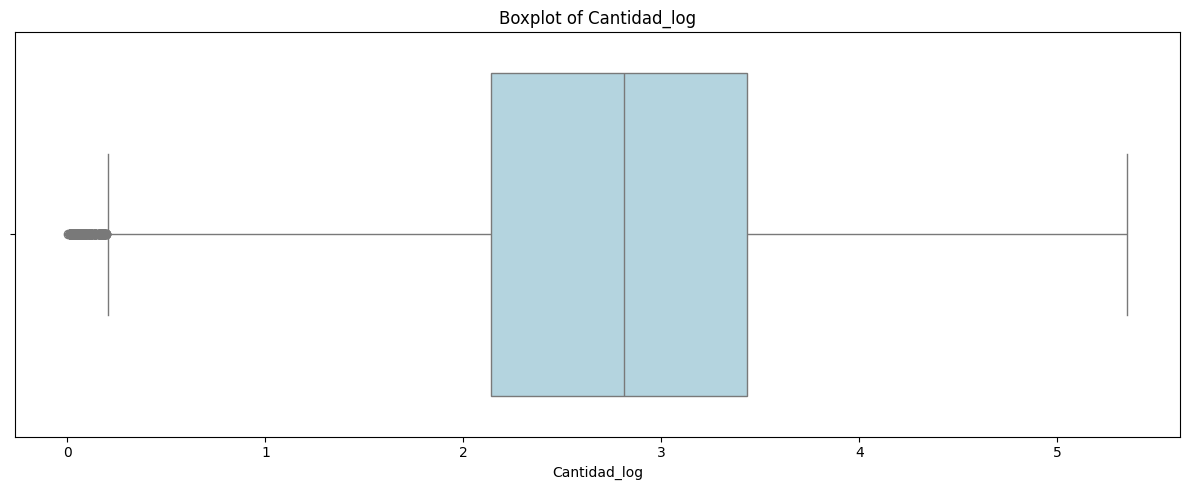

In [33]:
for i in lista_log_cuantitativo:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[i], color='lightblue')
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()

Notamos que si se controlo bien los valores altos , continuamos con el analisis de las variables cualitativas

## ANALISIS UNIVARIADO- Variables cualitativas

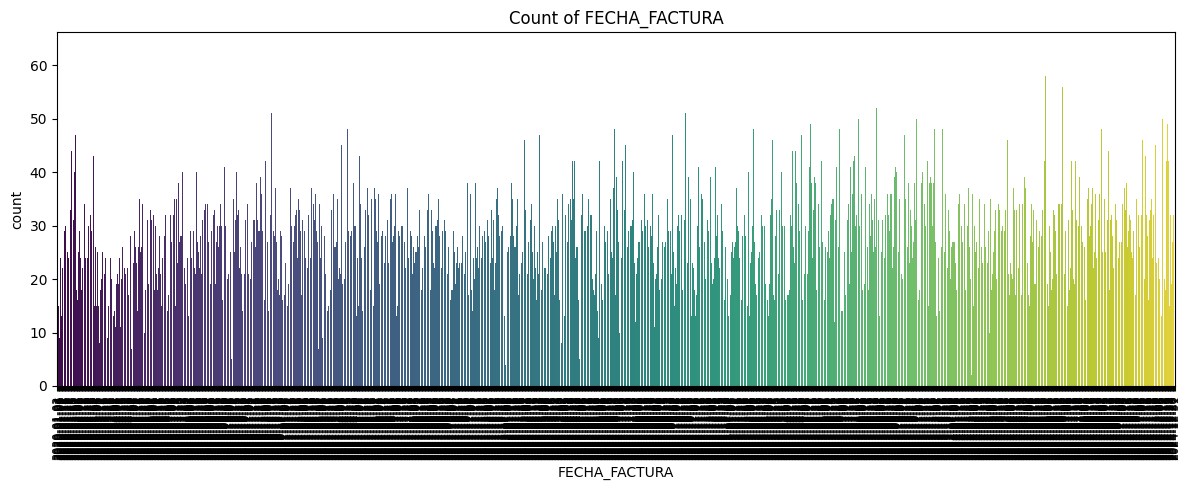

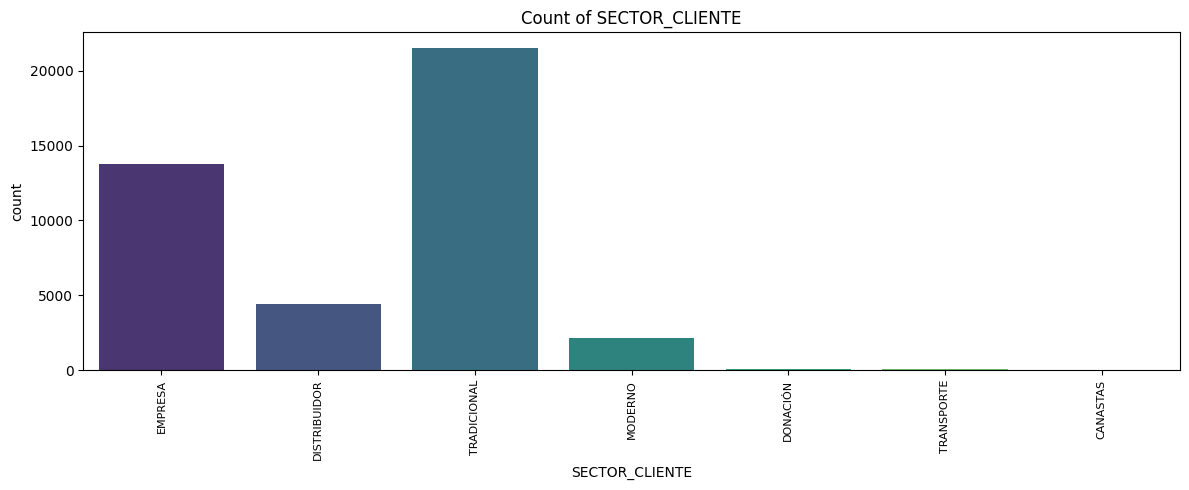

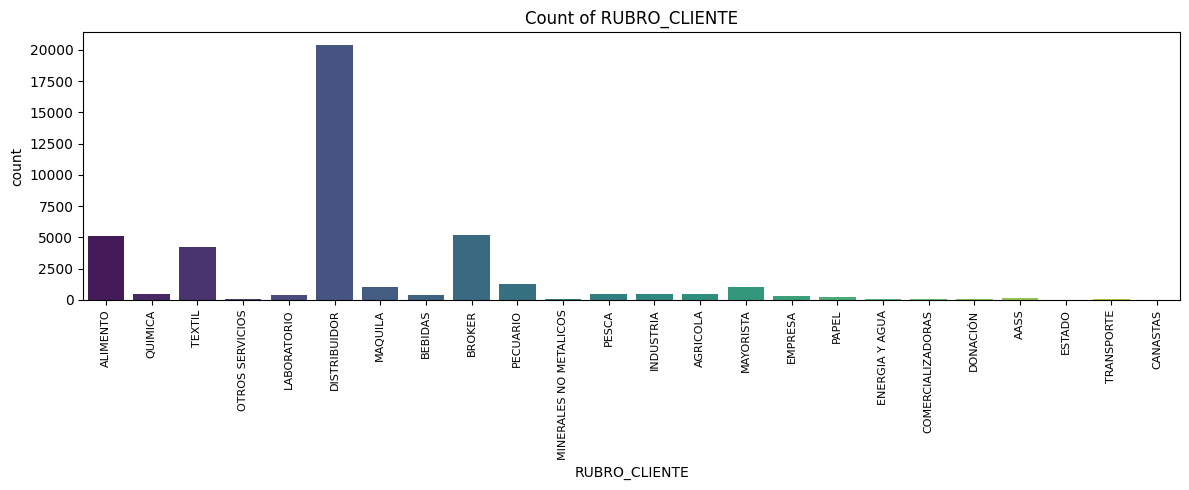

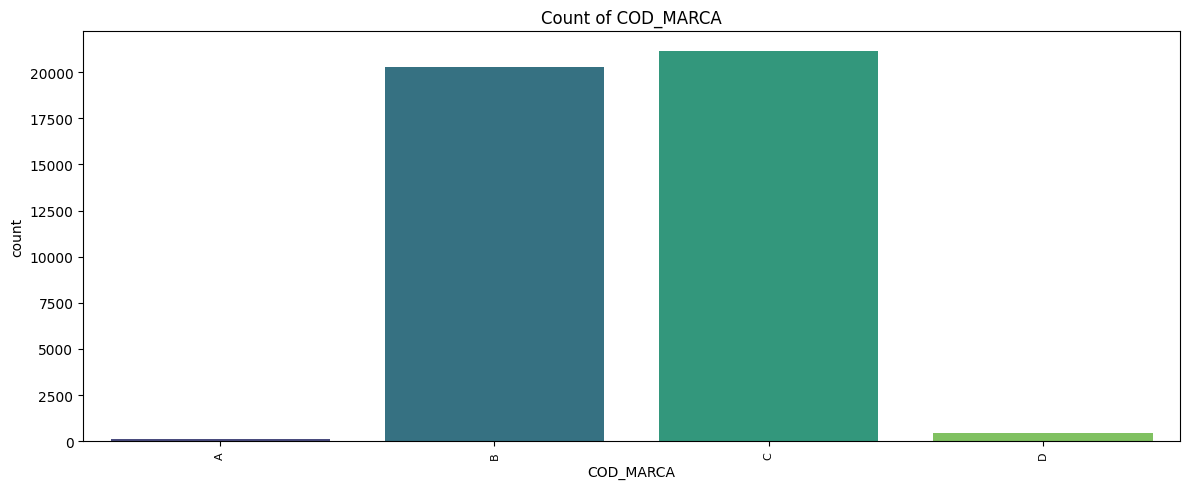

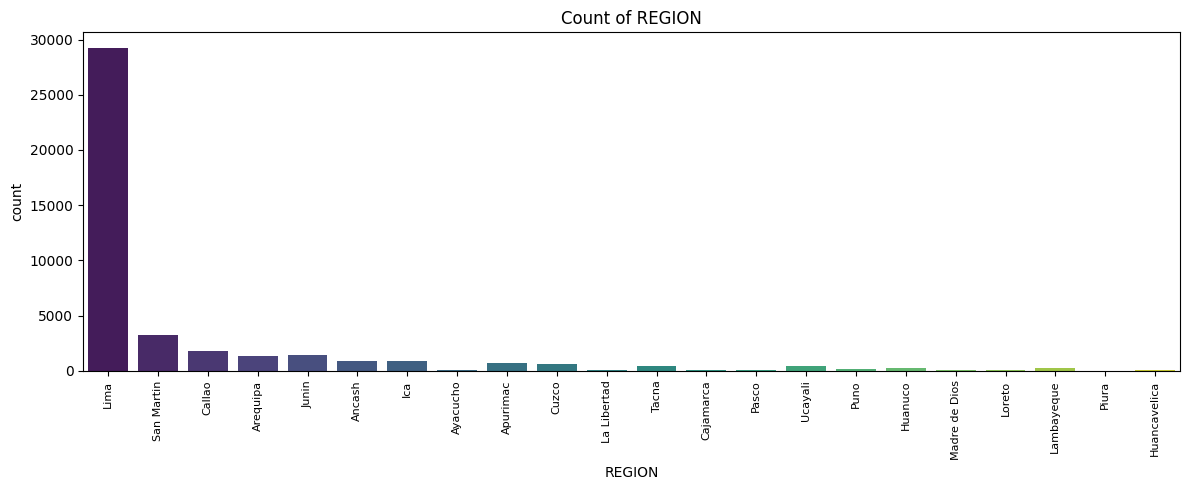

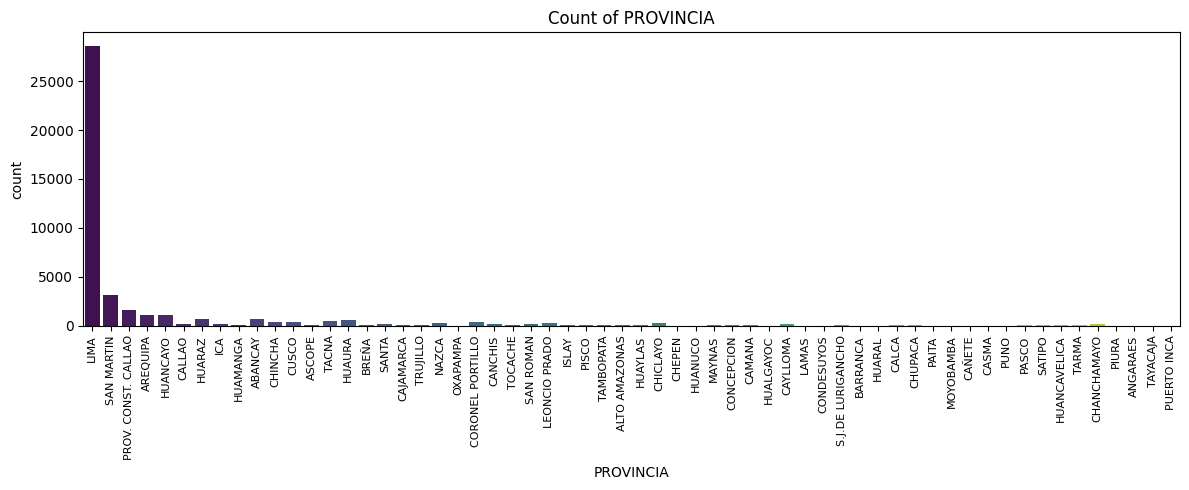

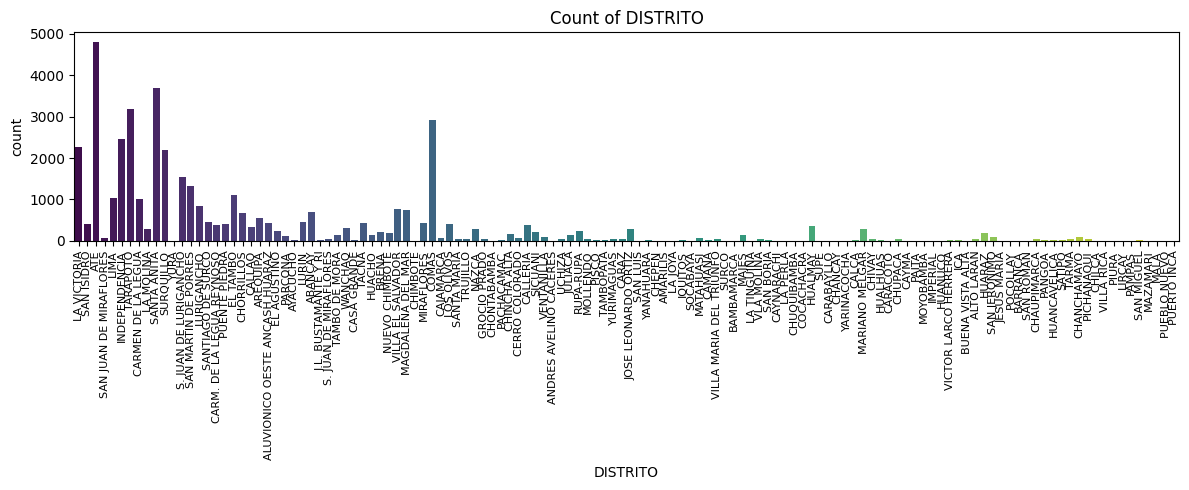

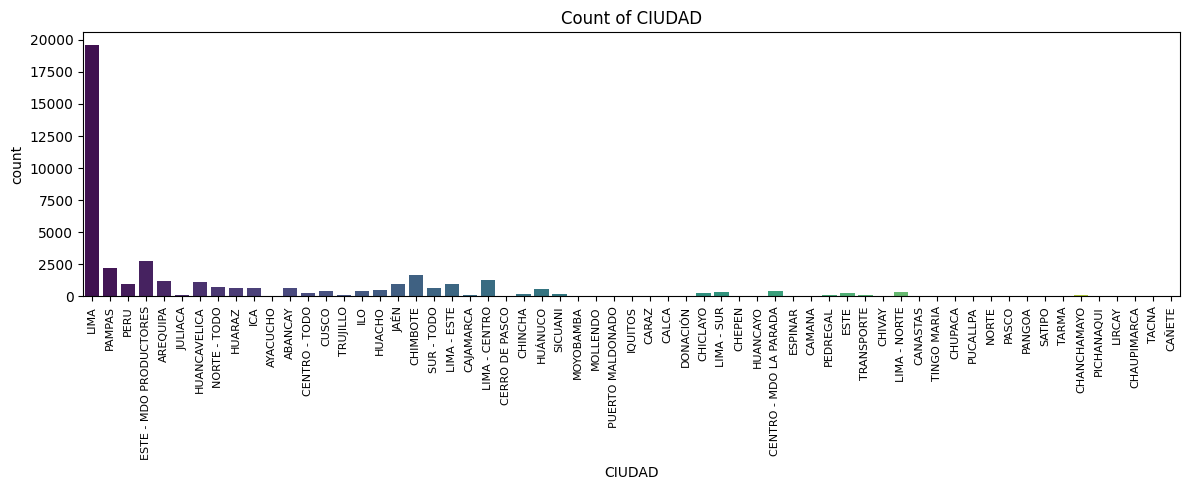

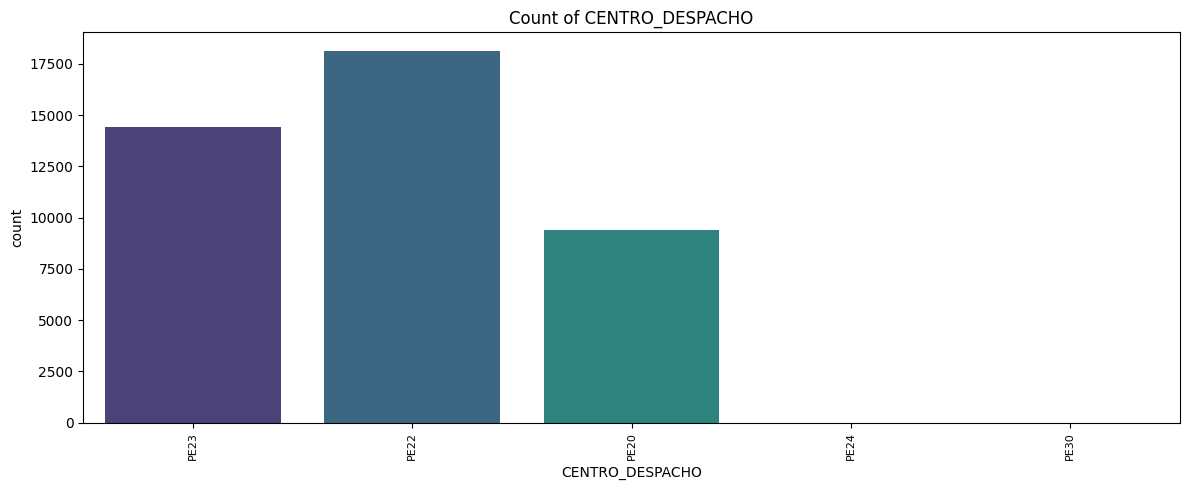

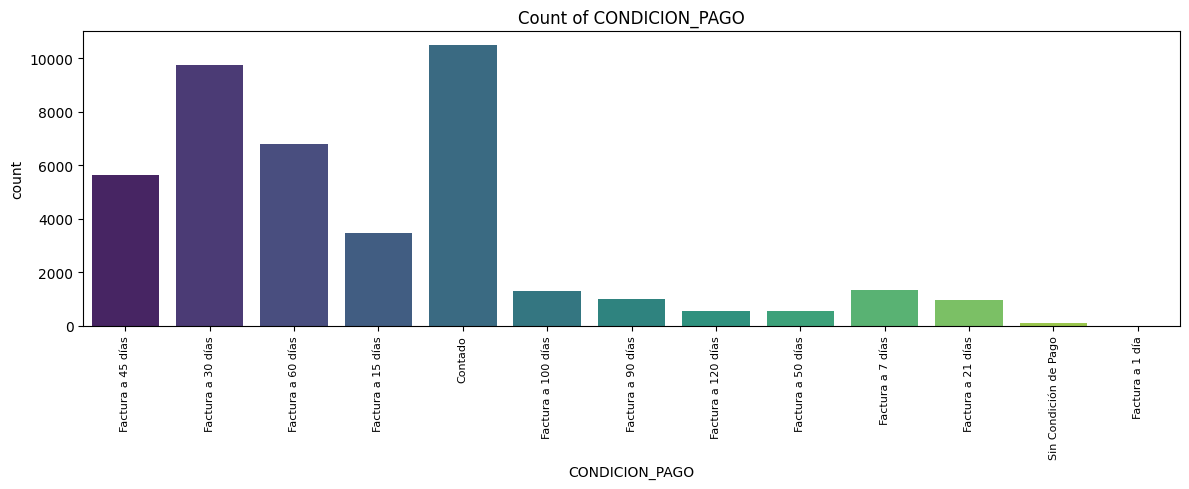

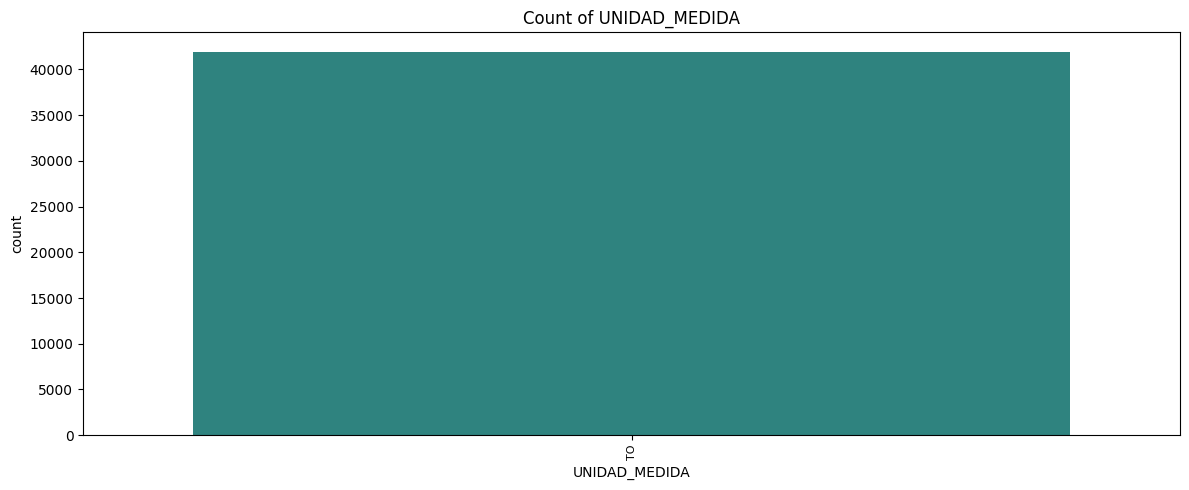

In [34]:
for i in lista_cualitativa:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=i, hue=i, palette='viridis', legend=False)
    plt.xticks(rotation=90, fontsize=8)
    plt.title(f'Count of {i}')
    plt.tight_layout()
    plt.show()

 * Notamos que la variable UNIDAD_MEDIDA tiene solo 1 categoria y que en algunas variables, hay varios pequeños datos que podrian generar ruido , por lo que  agrupariamos esas categorias de poca fecuencia en una seccion llamada " otros"

In [35]:
df["SECTOR_CLIENTE"]= df["SECTOR_CLIENTE"].apply(lambda x: "Otros" if x in ["TRANSPORTE","DONACIÓN","CANASTAS"] else x  )
df["RUBRO_CLIENTE"]= df["RUBRO_CLIENTE"].apply(lambda x: "Otros" if x not in ["DISTRIBUIDOR","TEXTIL","ALIMENTO","BROKER"] else x  )
df["COD_MARCA"]= df["COD_MARCA"].apply(lambda x: "Otros" if x in ["D","A"] else x  )
df["CENTRO_DESPACHO"]= df["CENTRO_DESPACHO"].apply(lambda x: "Otros" if x  in ["PE30","PE24"] else x  )
df["CONDICION_PAGO"]= df["CONDICION_PAGO"].apply(lambda x: "Otros" if x  in ["Sin Condición de Pago","Factura a 1 día","Factura a 100 días","Factura a 90 días","Factura a 50 días","Factura a 7 días","Factura a 21 días"] else x  )
df["REGION"]= df["REGION"].apply(lambda x: "Otros" if x  not in ["Lima"] else x  )

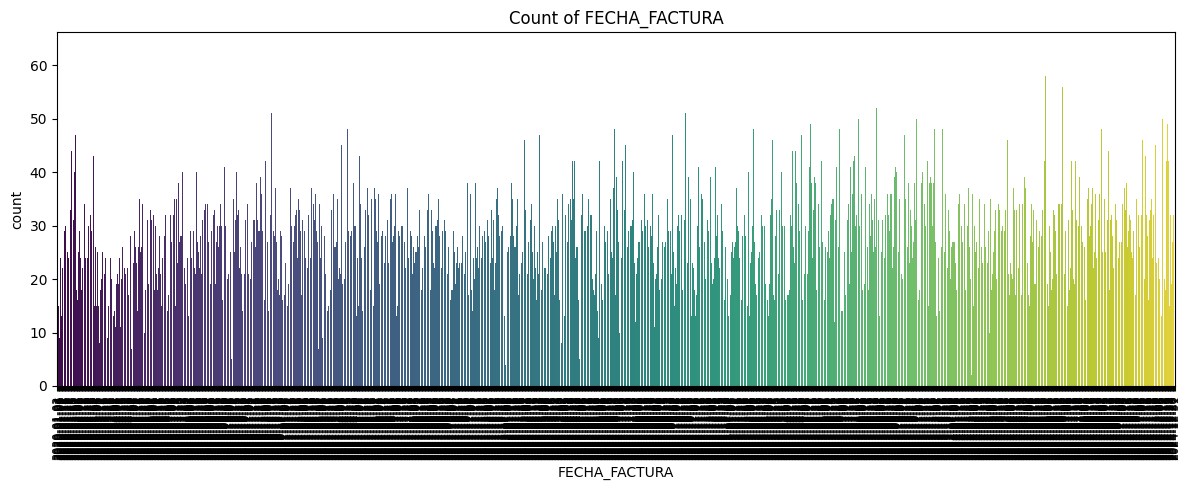

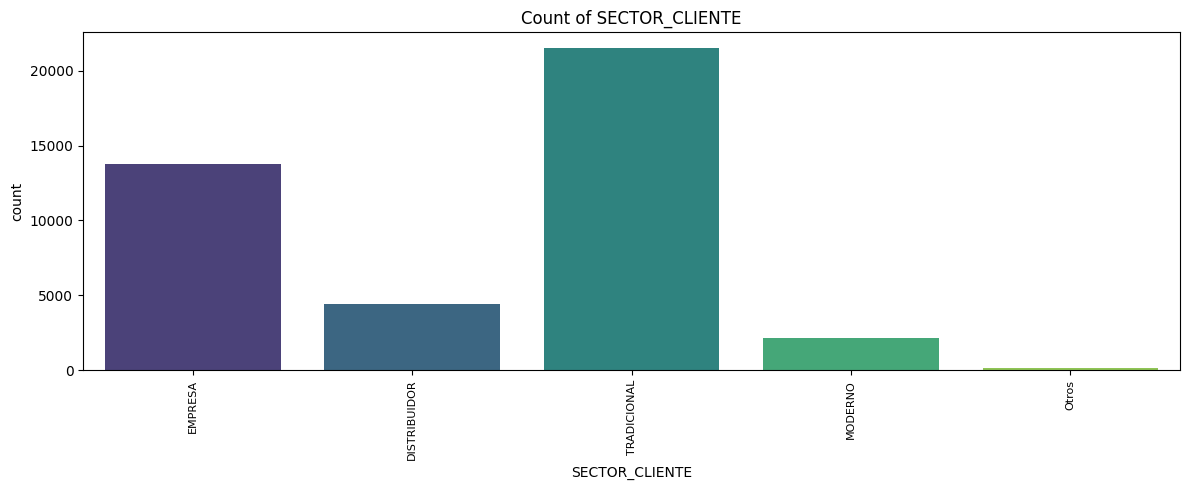

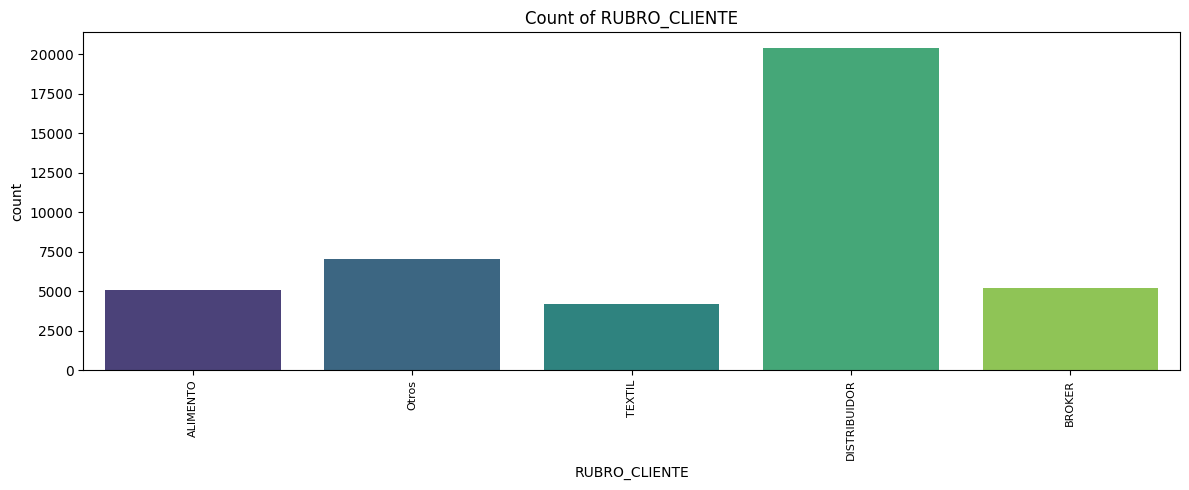

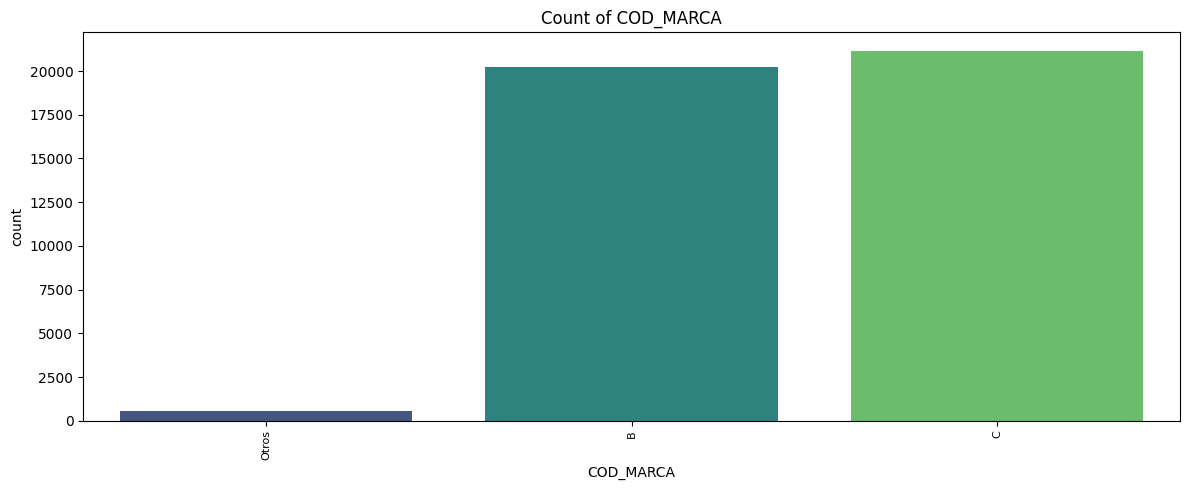

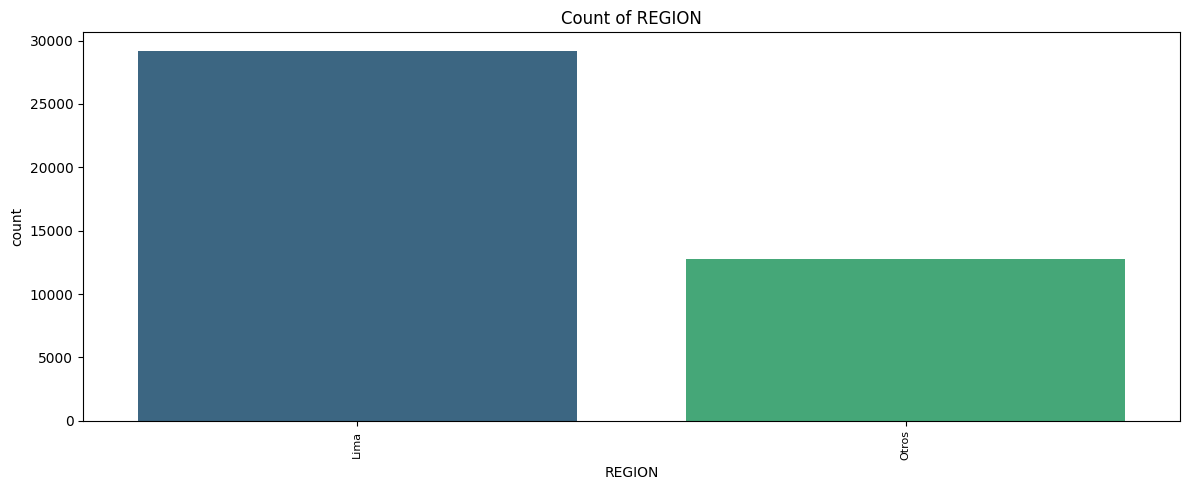

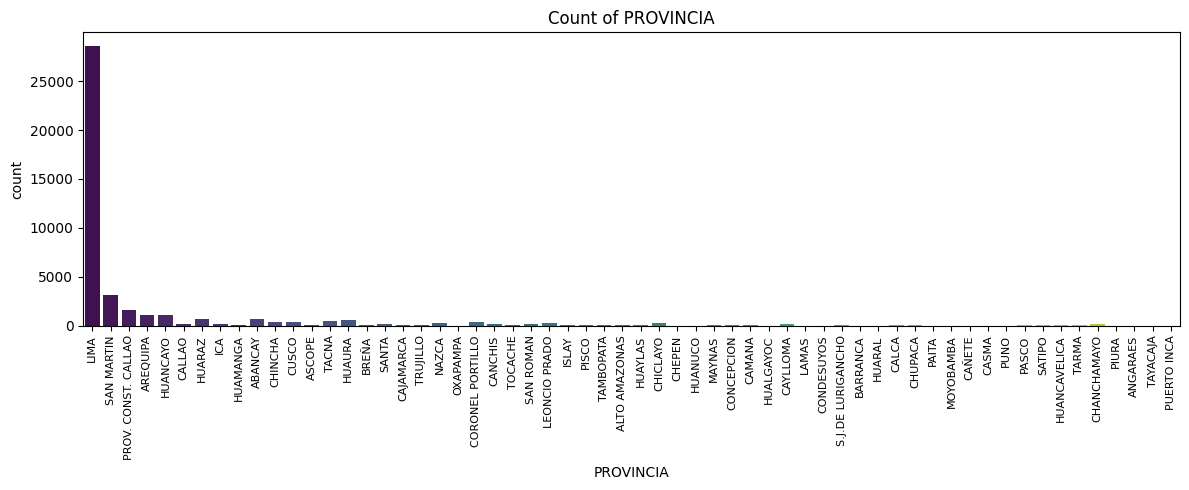

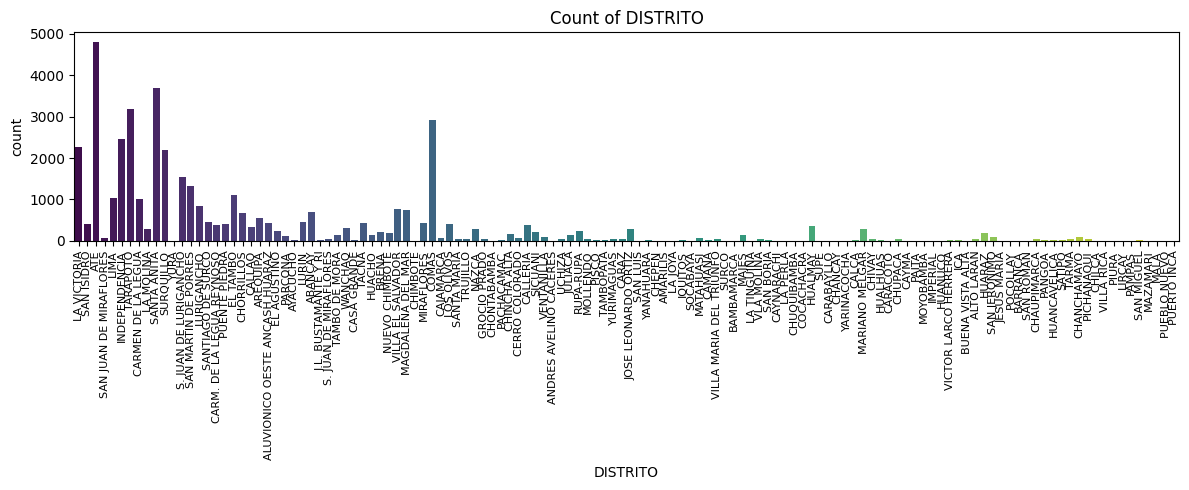

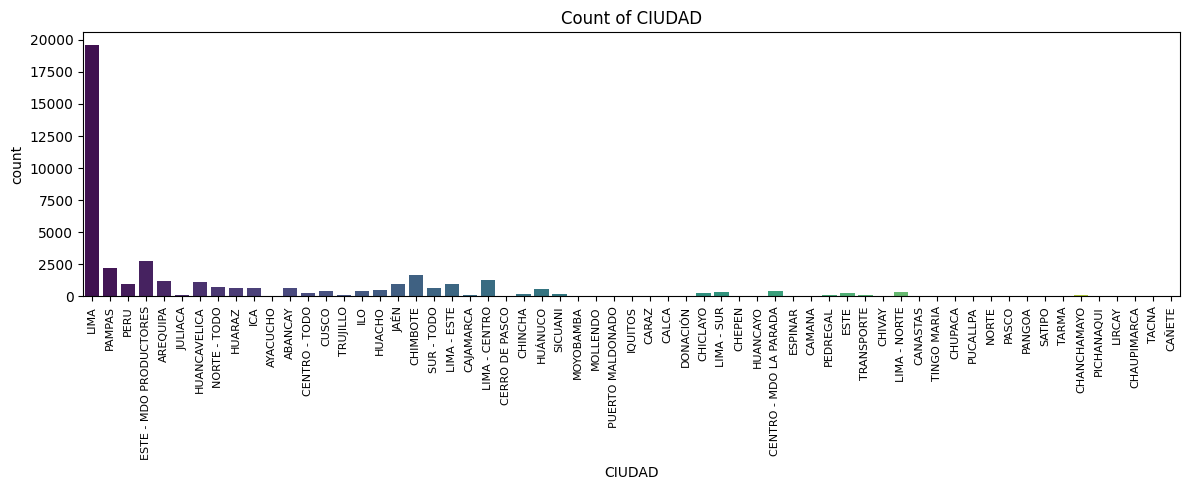

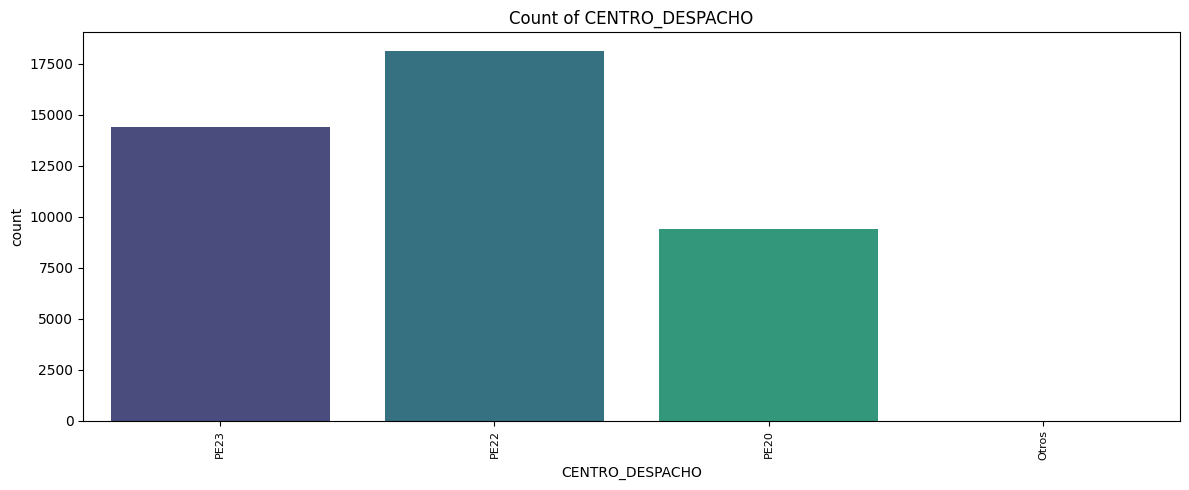

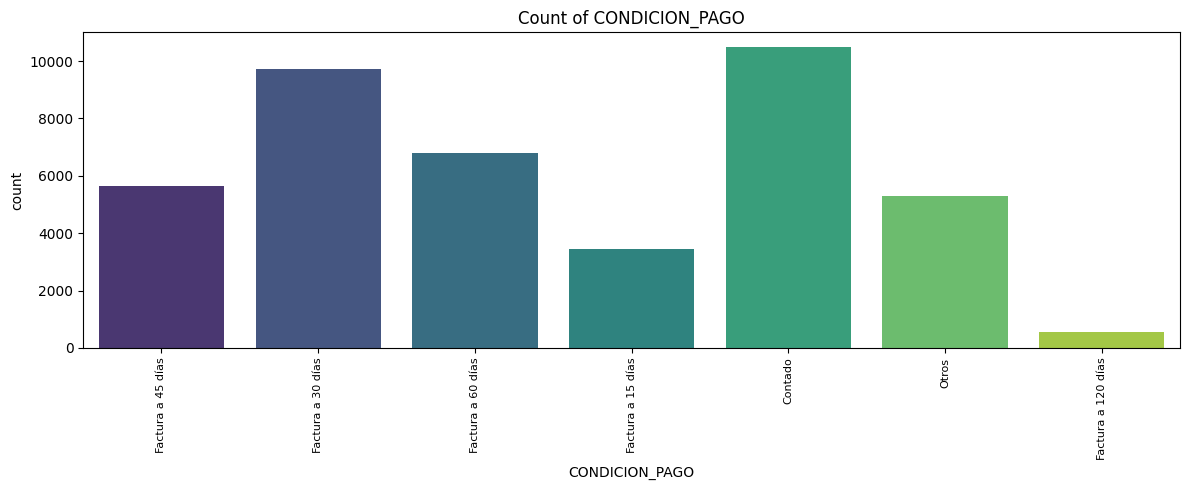

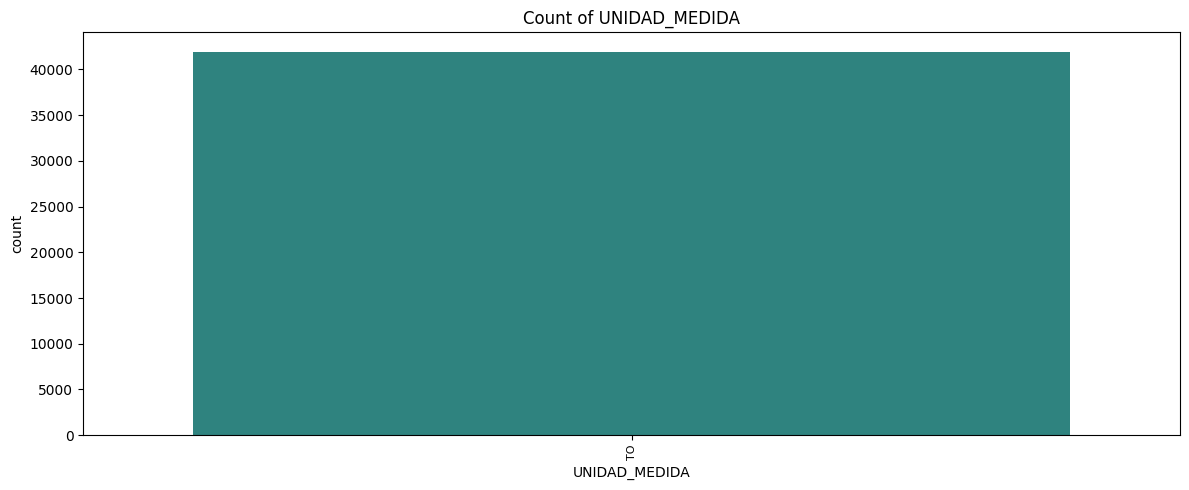

In [36]:
for i in lista_cualitativa:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=i, hue=i, palette='viridis', legend=False)
    plt.xticks(rotation=90, fontsize=8)
    plt.title(f'Count of {i}')
    plt.tight_layout()
    plt.show()

Ahora veremos si las categorias de cada variable, son diferenciables en el target a traves de un boxplot

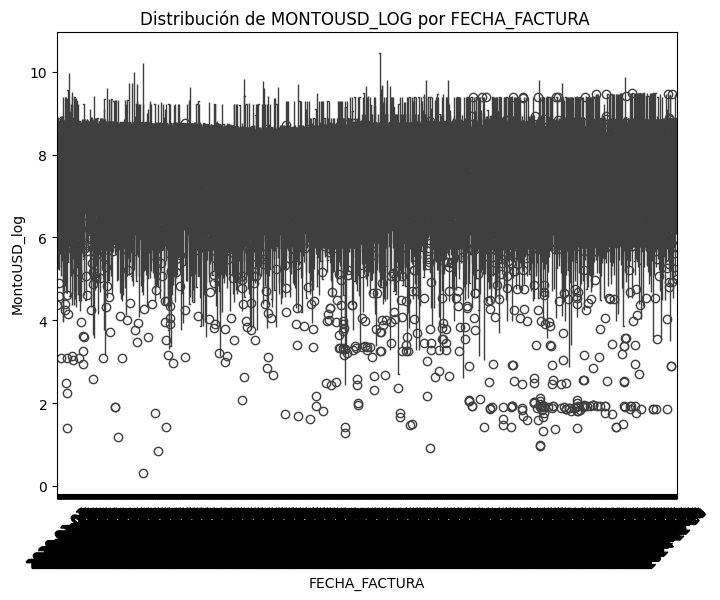

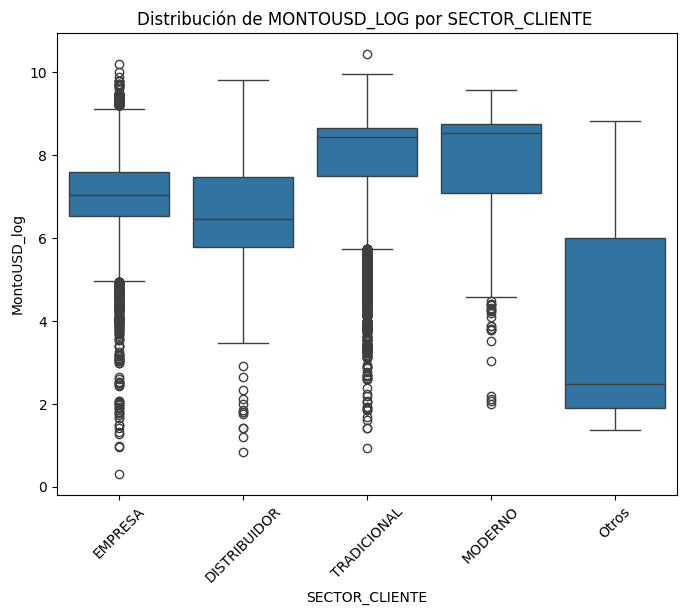

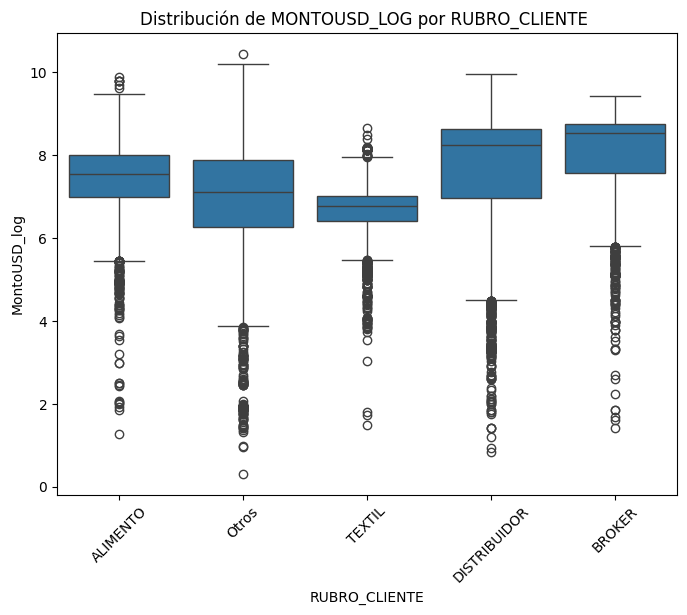

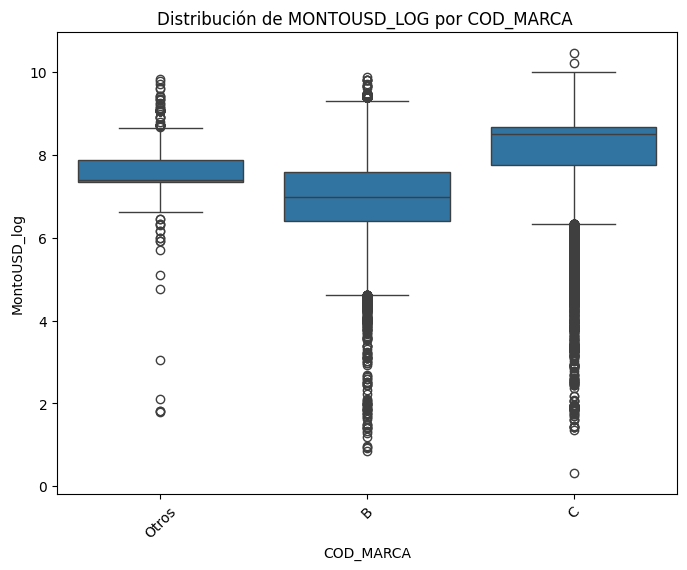

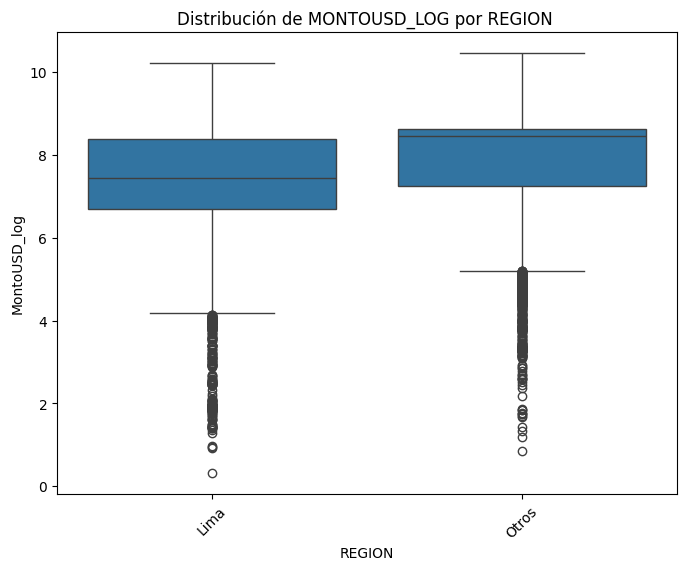

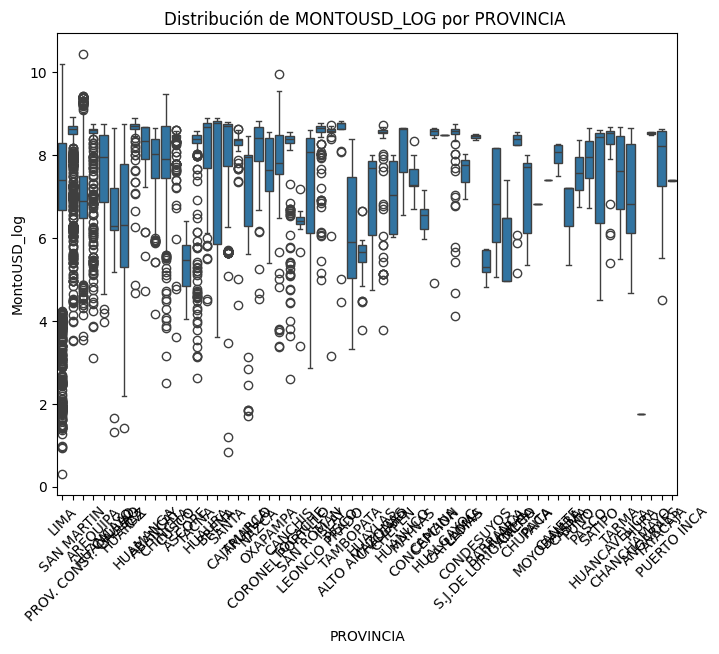

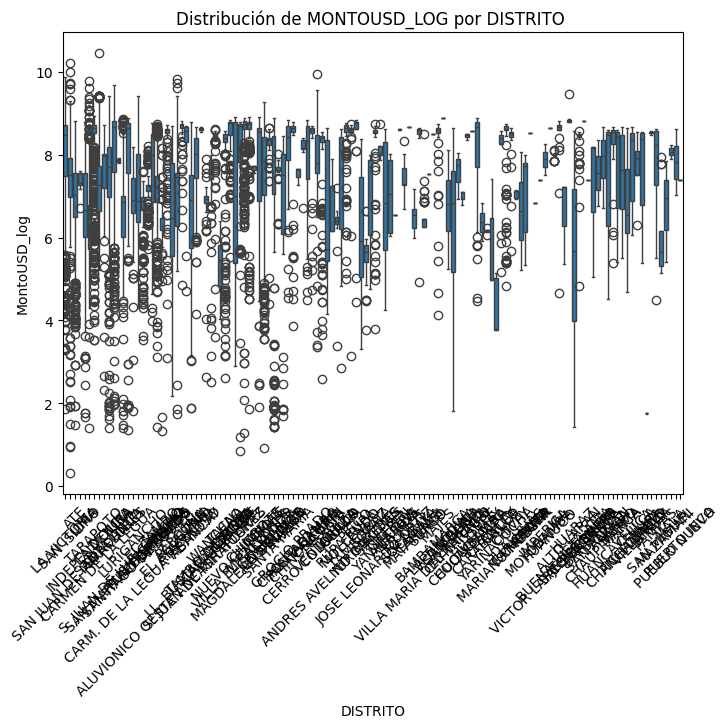

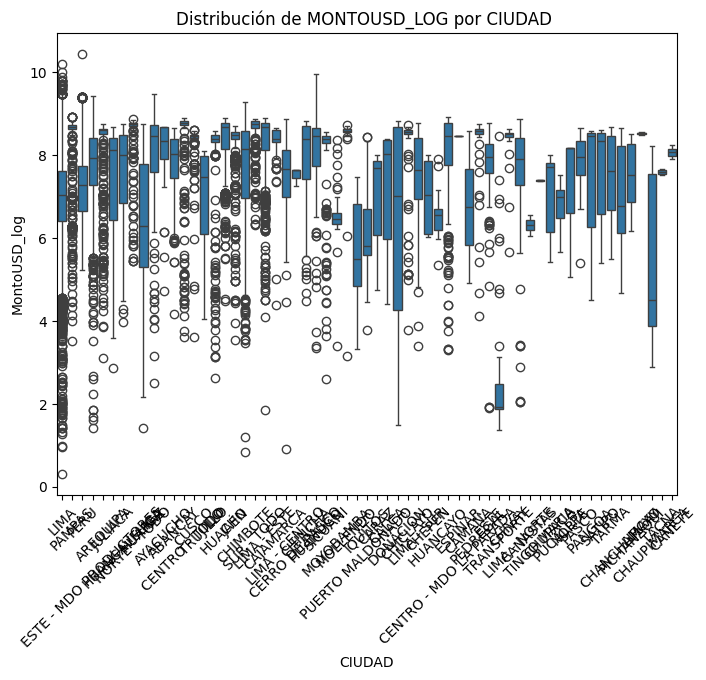

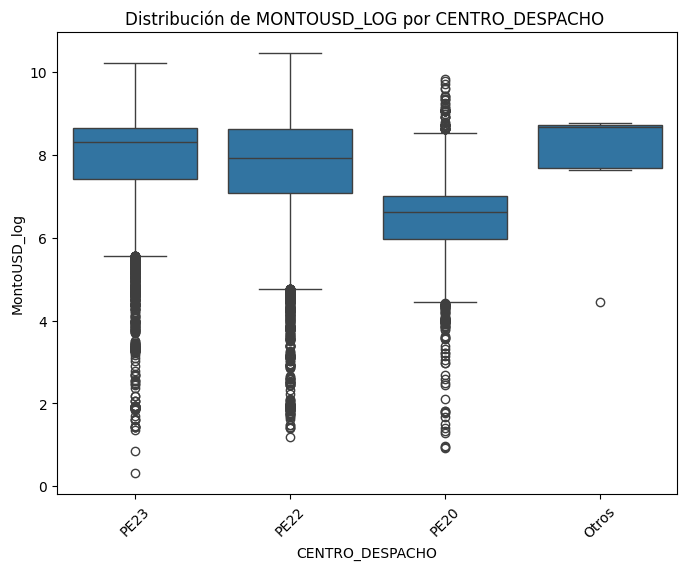

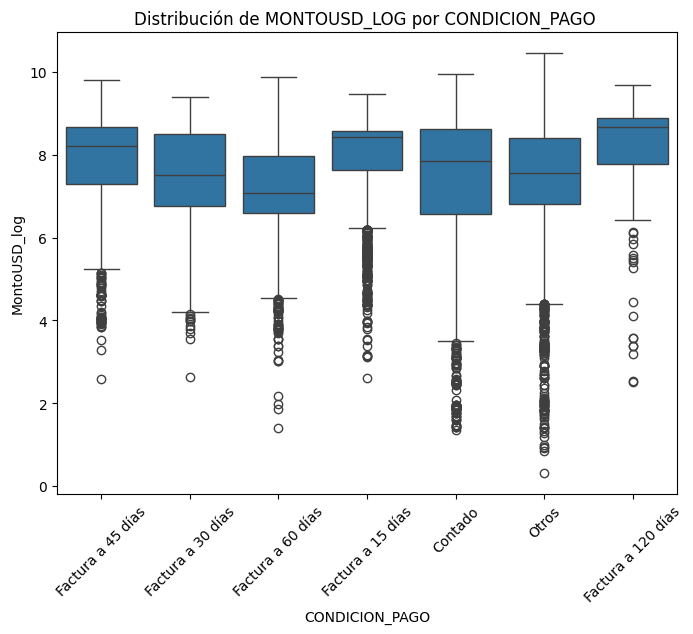

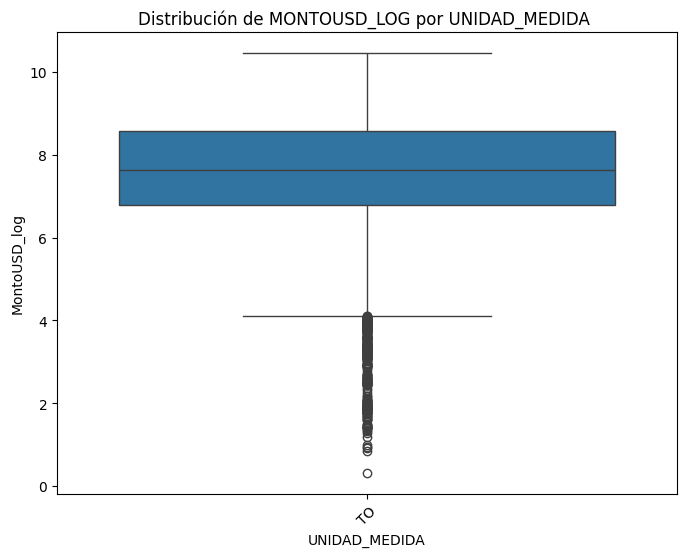

In [37]:
for i in lista_cualitativa:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=i, y="MontoUSD_log")
    plt.title(f"Distribución de MONTOUSD_LOG por {i} ")
    plt.xticks(rotation=45)
    plt.show()

Notamos que varias categorias se solapan y por lo tanto no generarian impacto en el modelo , sin embargo analizaremos mas si podemos agruparlos nuevamente

In [38]:
target="MontoUSD_log"

C:\Users\asus\AppData\Local\Temp\ipykernel_18504\1292684069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


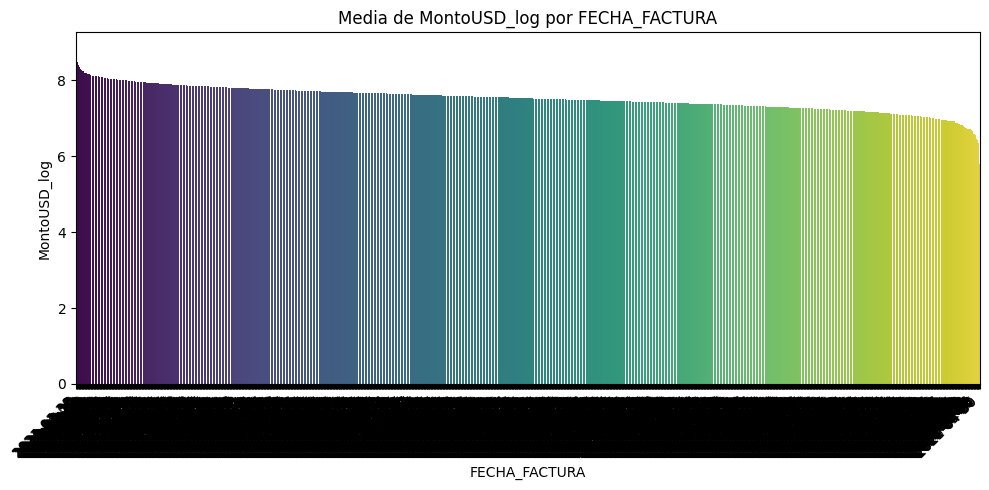

C:\Users\asus\AppData\Local\Temp\ipykernel_18504\1292684069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


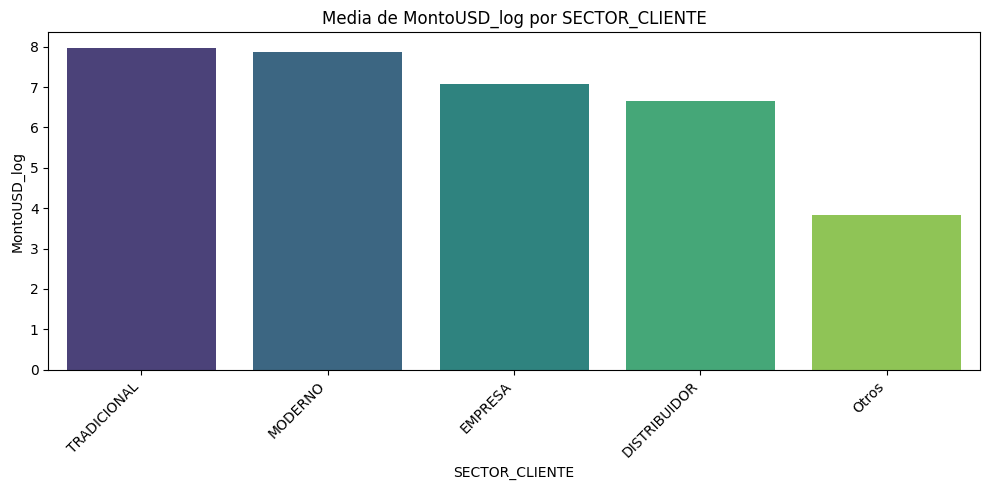

C:\Users\asus\AppData\Local\Temp\ipykernel_18504\1292684069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


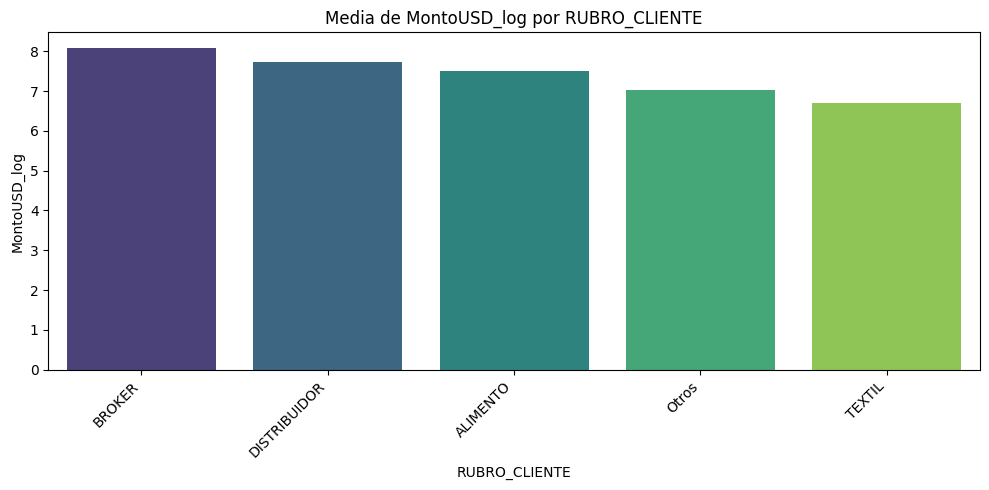

C:\Users\asus\AppData\Local\Temp\ipykernel_18504\1292684069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


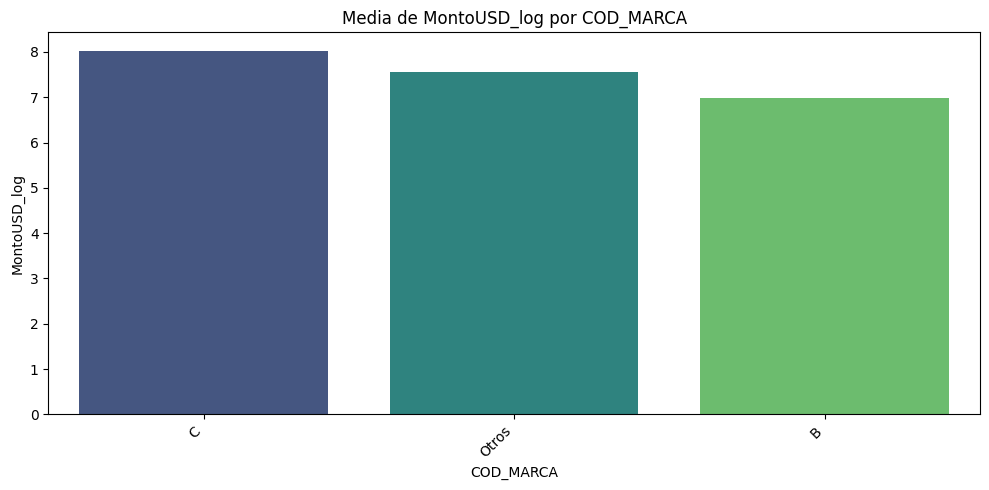

C:\Users\asus\AppData\Local\Temp\ipykernel_18504\1292684069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


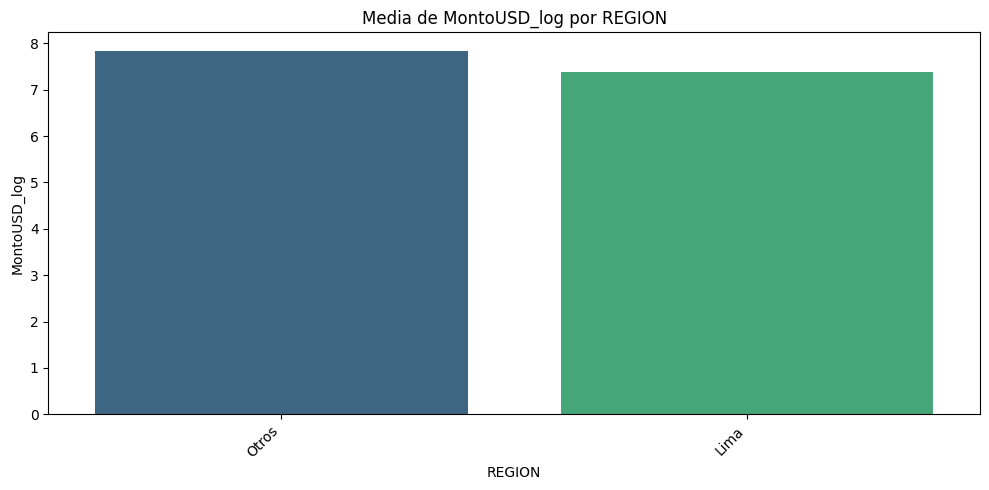

C:\Users\asus\AppData\Local\Temp\ipykernel_18504\1292684069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


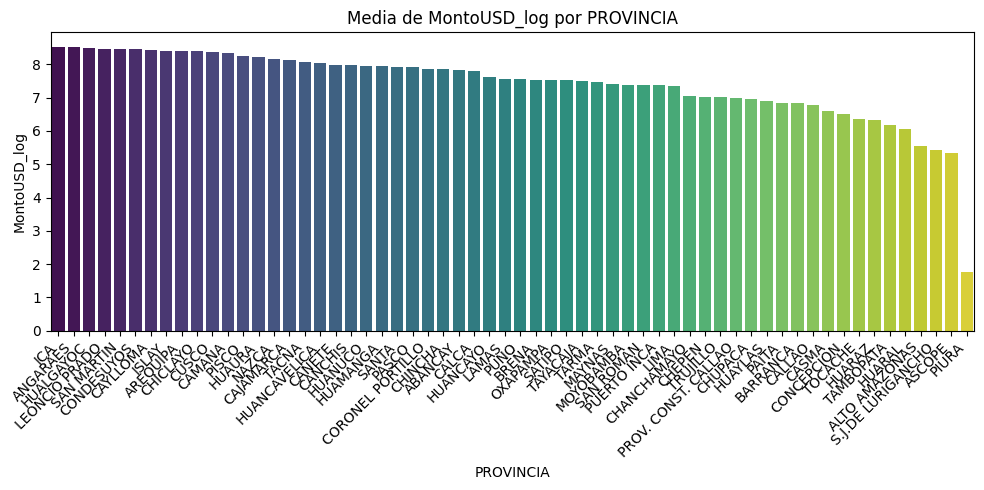

C:\Users\asus\AppData\Local\Temp\ipykernel_18504\1292684069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


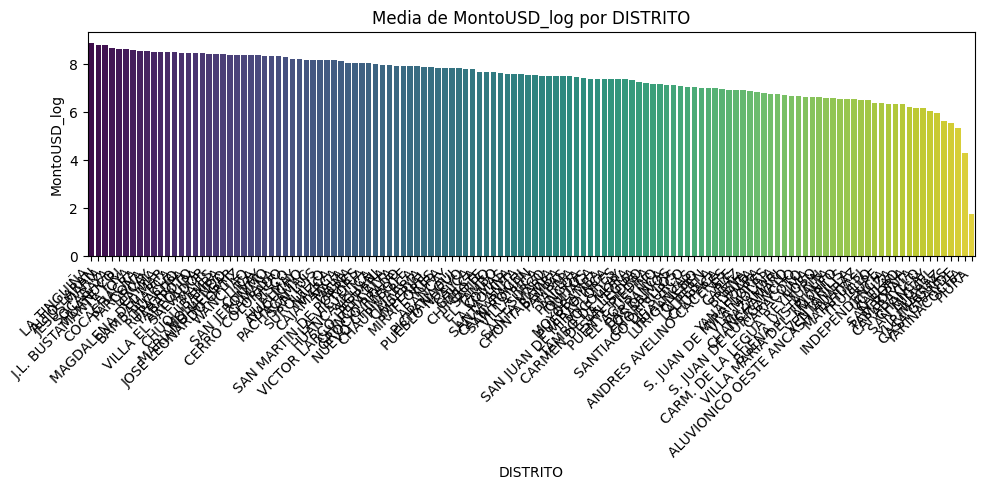

C:\Users\asus\AppData\Local\Temp\ipykernel_18504\1292684069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


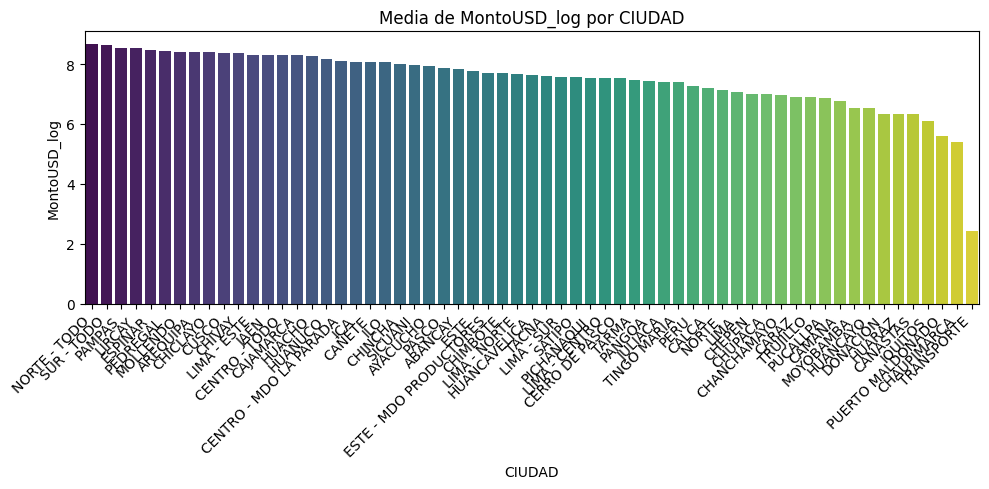

C:\Users\asus\AppData\Local\Temp\ipykernel_18504\1292684069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


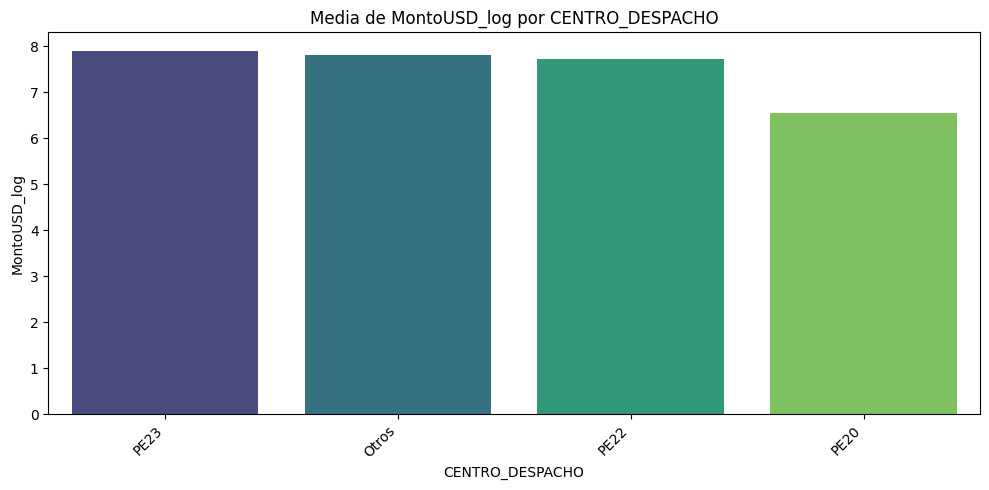

C:\Users\asus\AppData\Local\Temp\ipykernel_18504\1292684069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


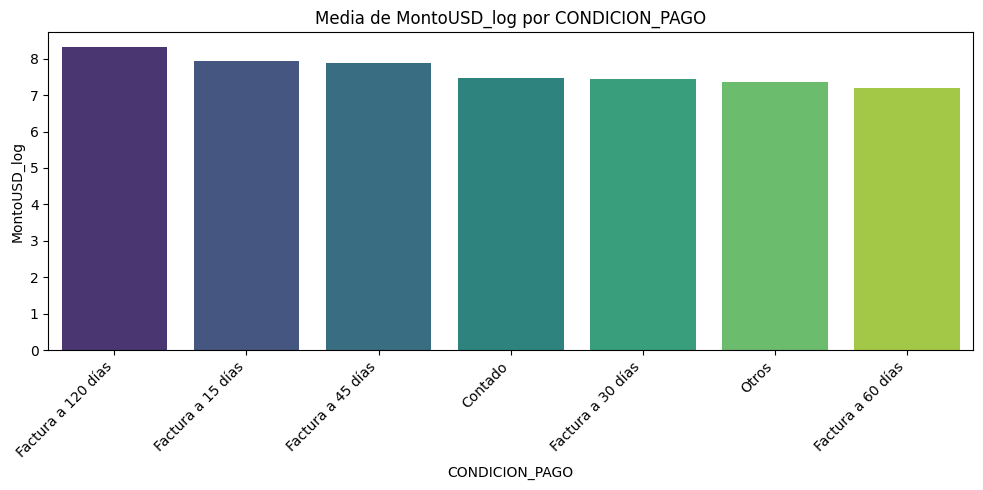

C:\Users\asus\AppData\Local\Temp\ipykernel_18504\1292684069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


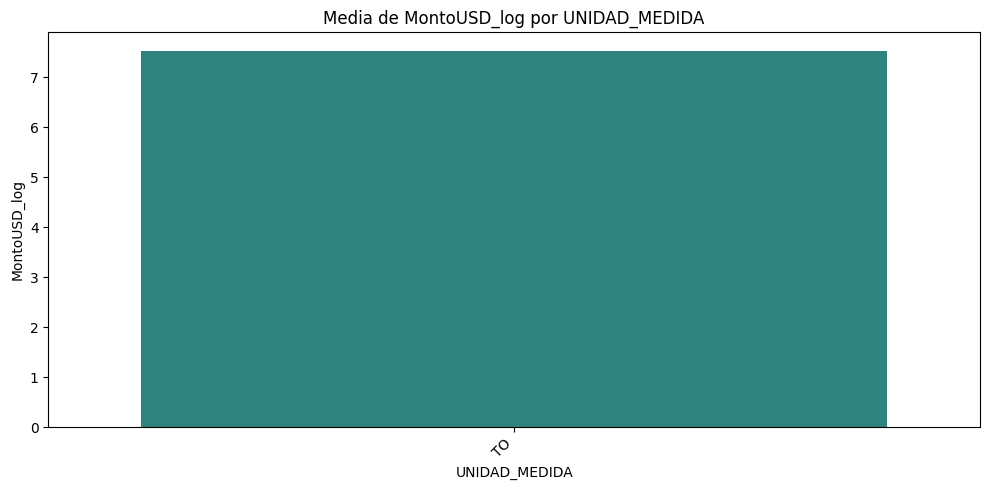

In [39]:
for col in lista_cualitativa:
    plt.figure(figsize=(10, 5))
    
    # Calcular medias ordenadas
    mean_df = df.groupby(col)[target].mean().reset_index()
    mean_df = mean_df.sort_values(by=target, ascending=False)
    
    # Gráfico de barras de medias
    sns.barplot(x=col, y=target, data=mean_df, palette="viridis")
    
    plt.title(f'Media de {target} por {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Guiandonos del boxplot y el grafico de medias , se opto por unir categorias que tenian la misma caracteristica y obtener asi mas impacto en el target

In [40]:
df["SECTOR_CLIENTE"]=df["SECTOR_CLIENTE"].apply(lambda x :"A" if x in ["EMPRESA","DISTRIBUIDOR"] else "B" if x in ["TRADICIONAL","MODERNO"] else "C" )
df["RUBRO_CLIENTE"]=df["RUBRO_CLIENTE"].apply(lambda x : "A" if x in ["ALIMENTO","Otros","TEXTIL"] else "B")
df["CENTRO_DESPACHO"]=df["CENTRO_DESPACHO"].apply(lambda x : "A" if x in ["PE23","P22","Otros"] else "B")

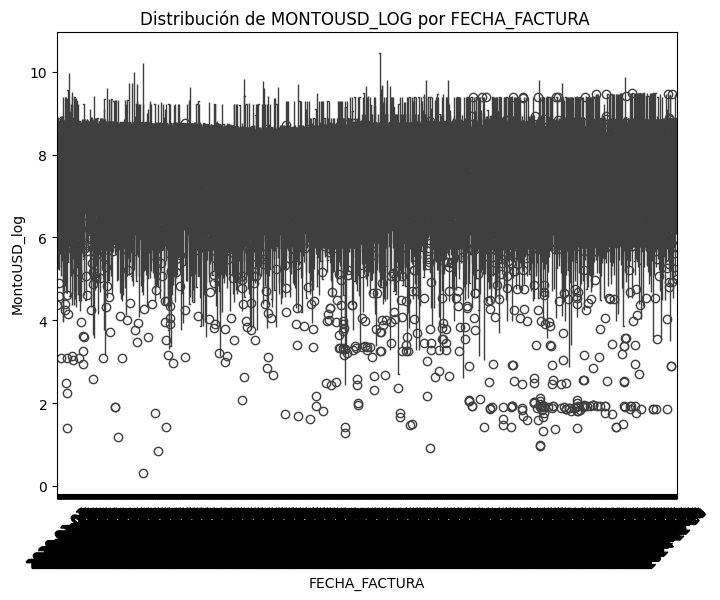

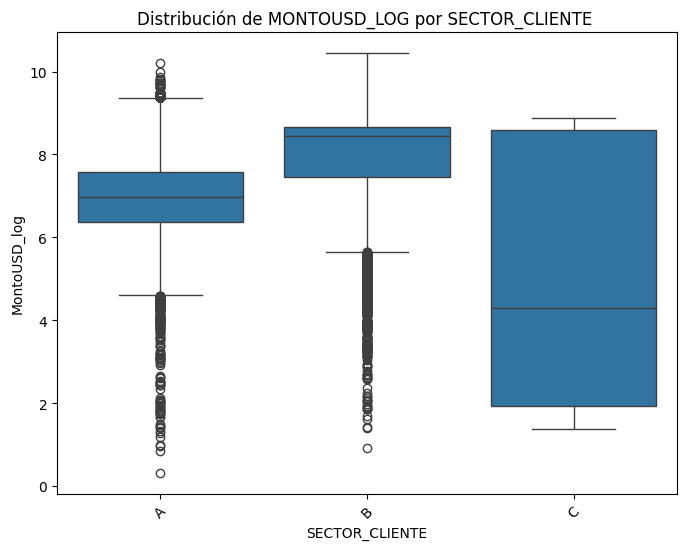

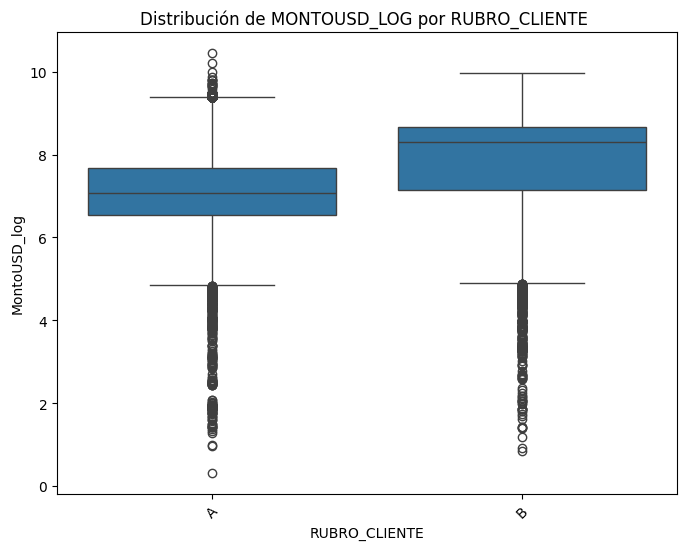

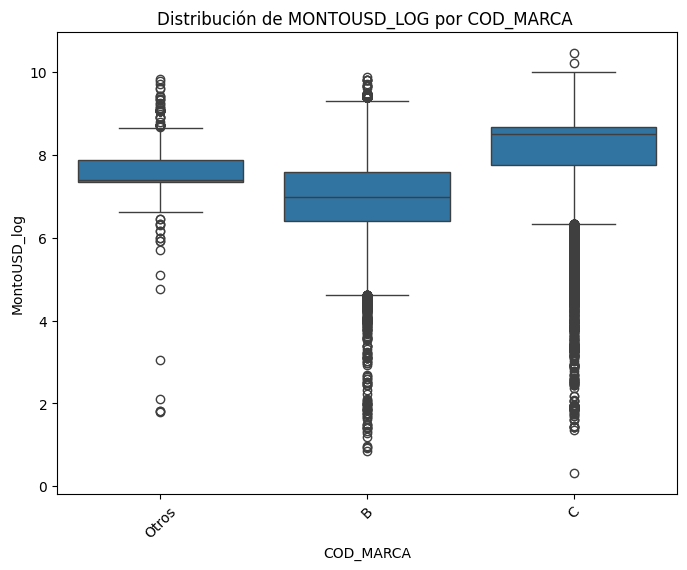

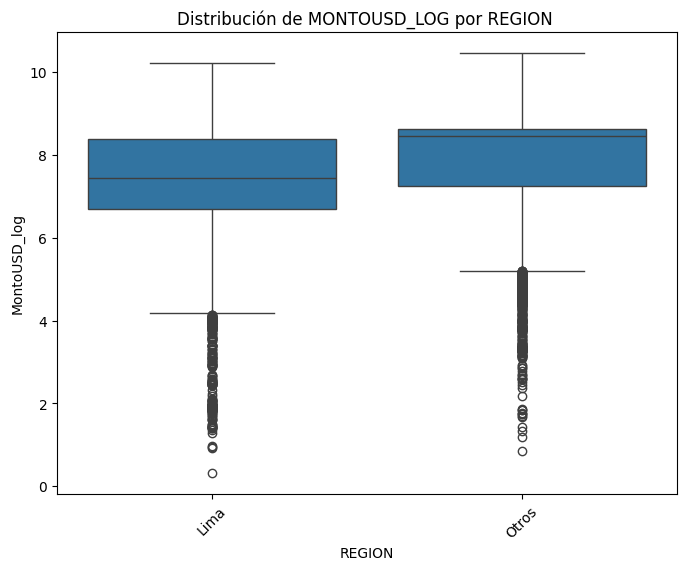

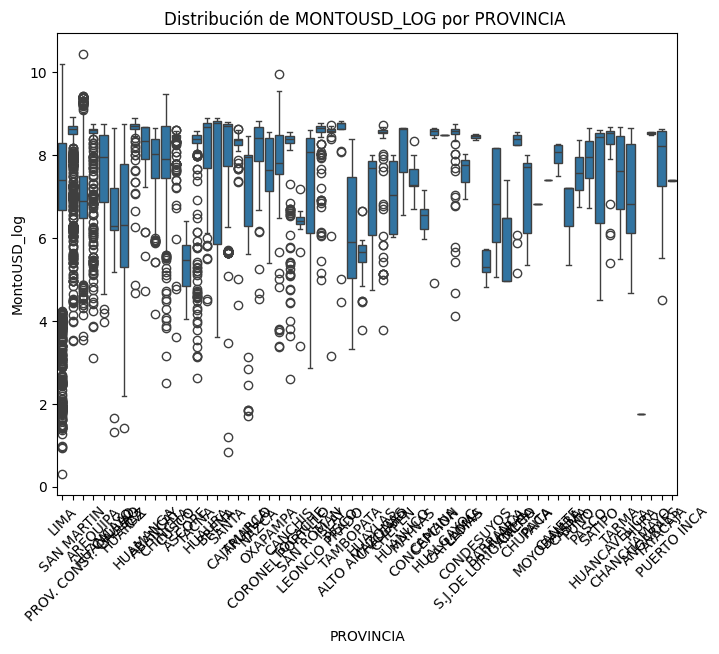

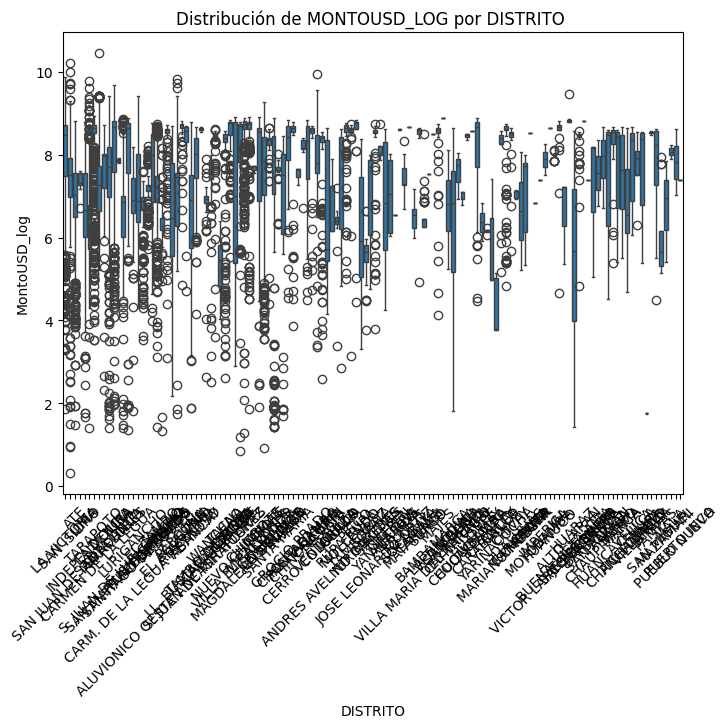

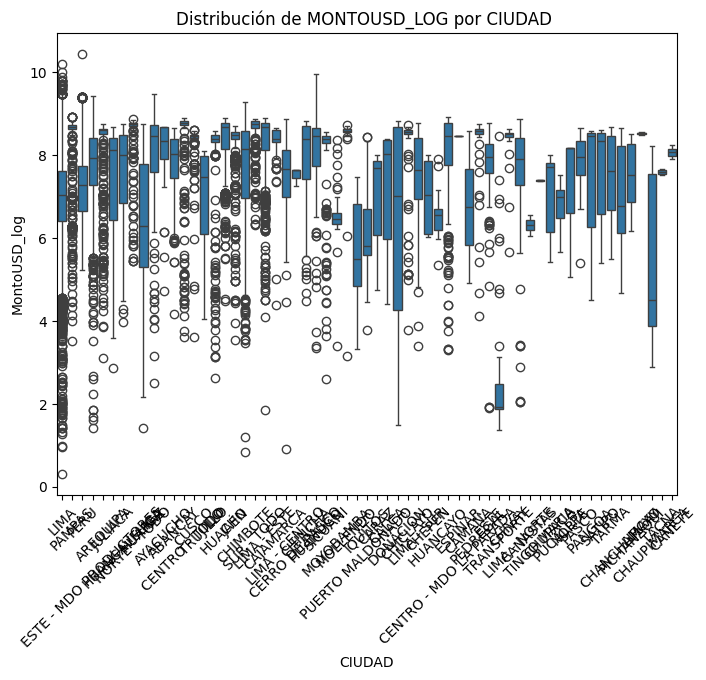

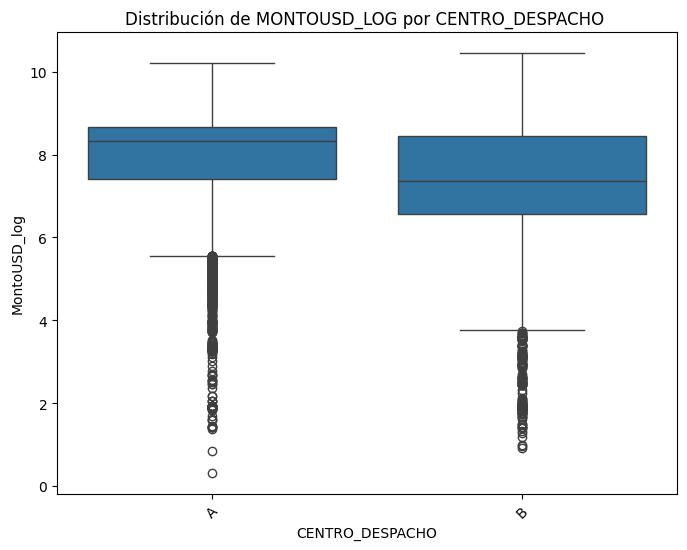

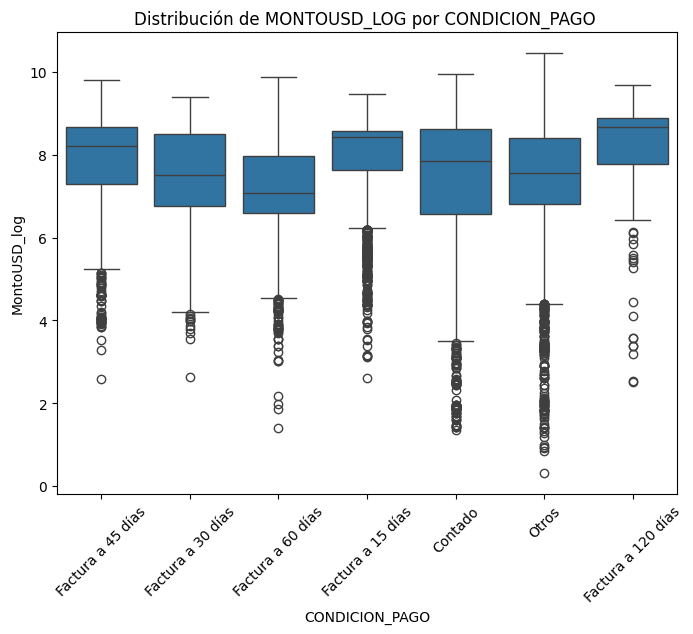

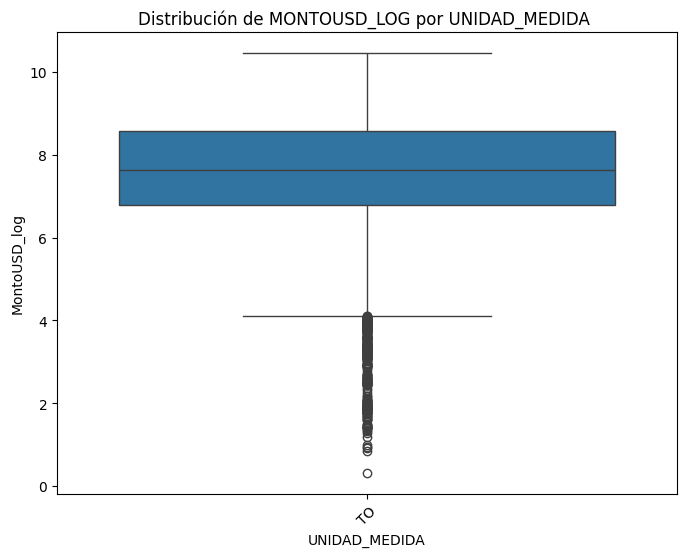

In [41]:
for i in lista_cualitativa:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=i, y="MontoUSD_log")
    plt.title(f"Distribución de MONTOUSD_LOG por {i} ")
    plt.xticks(rotation=45)
    plt.show()

Notamos que si se mejoro algunas categorias, y algunas siguen solapandose, por lo qque obtaremos a retirar aquellas que se solpana y quedar con las variables que  no se solapan

## Análisis de Correlación

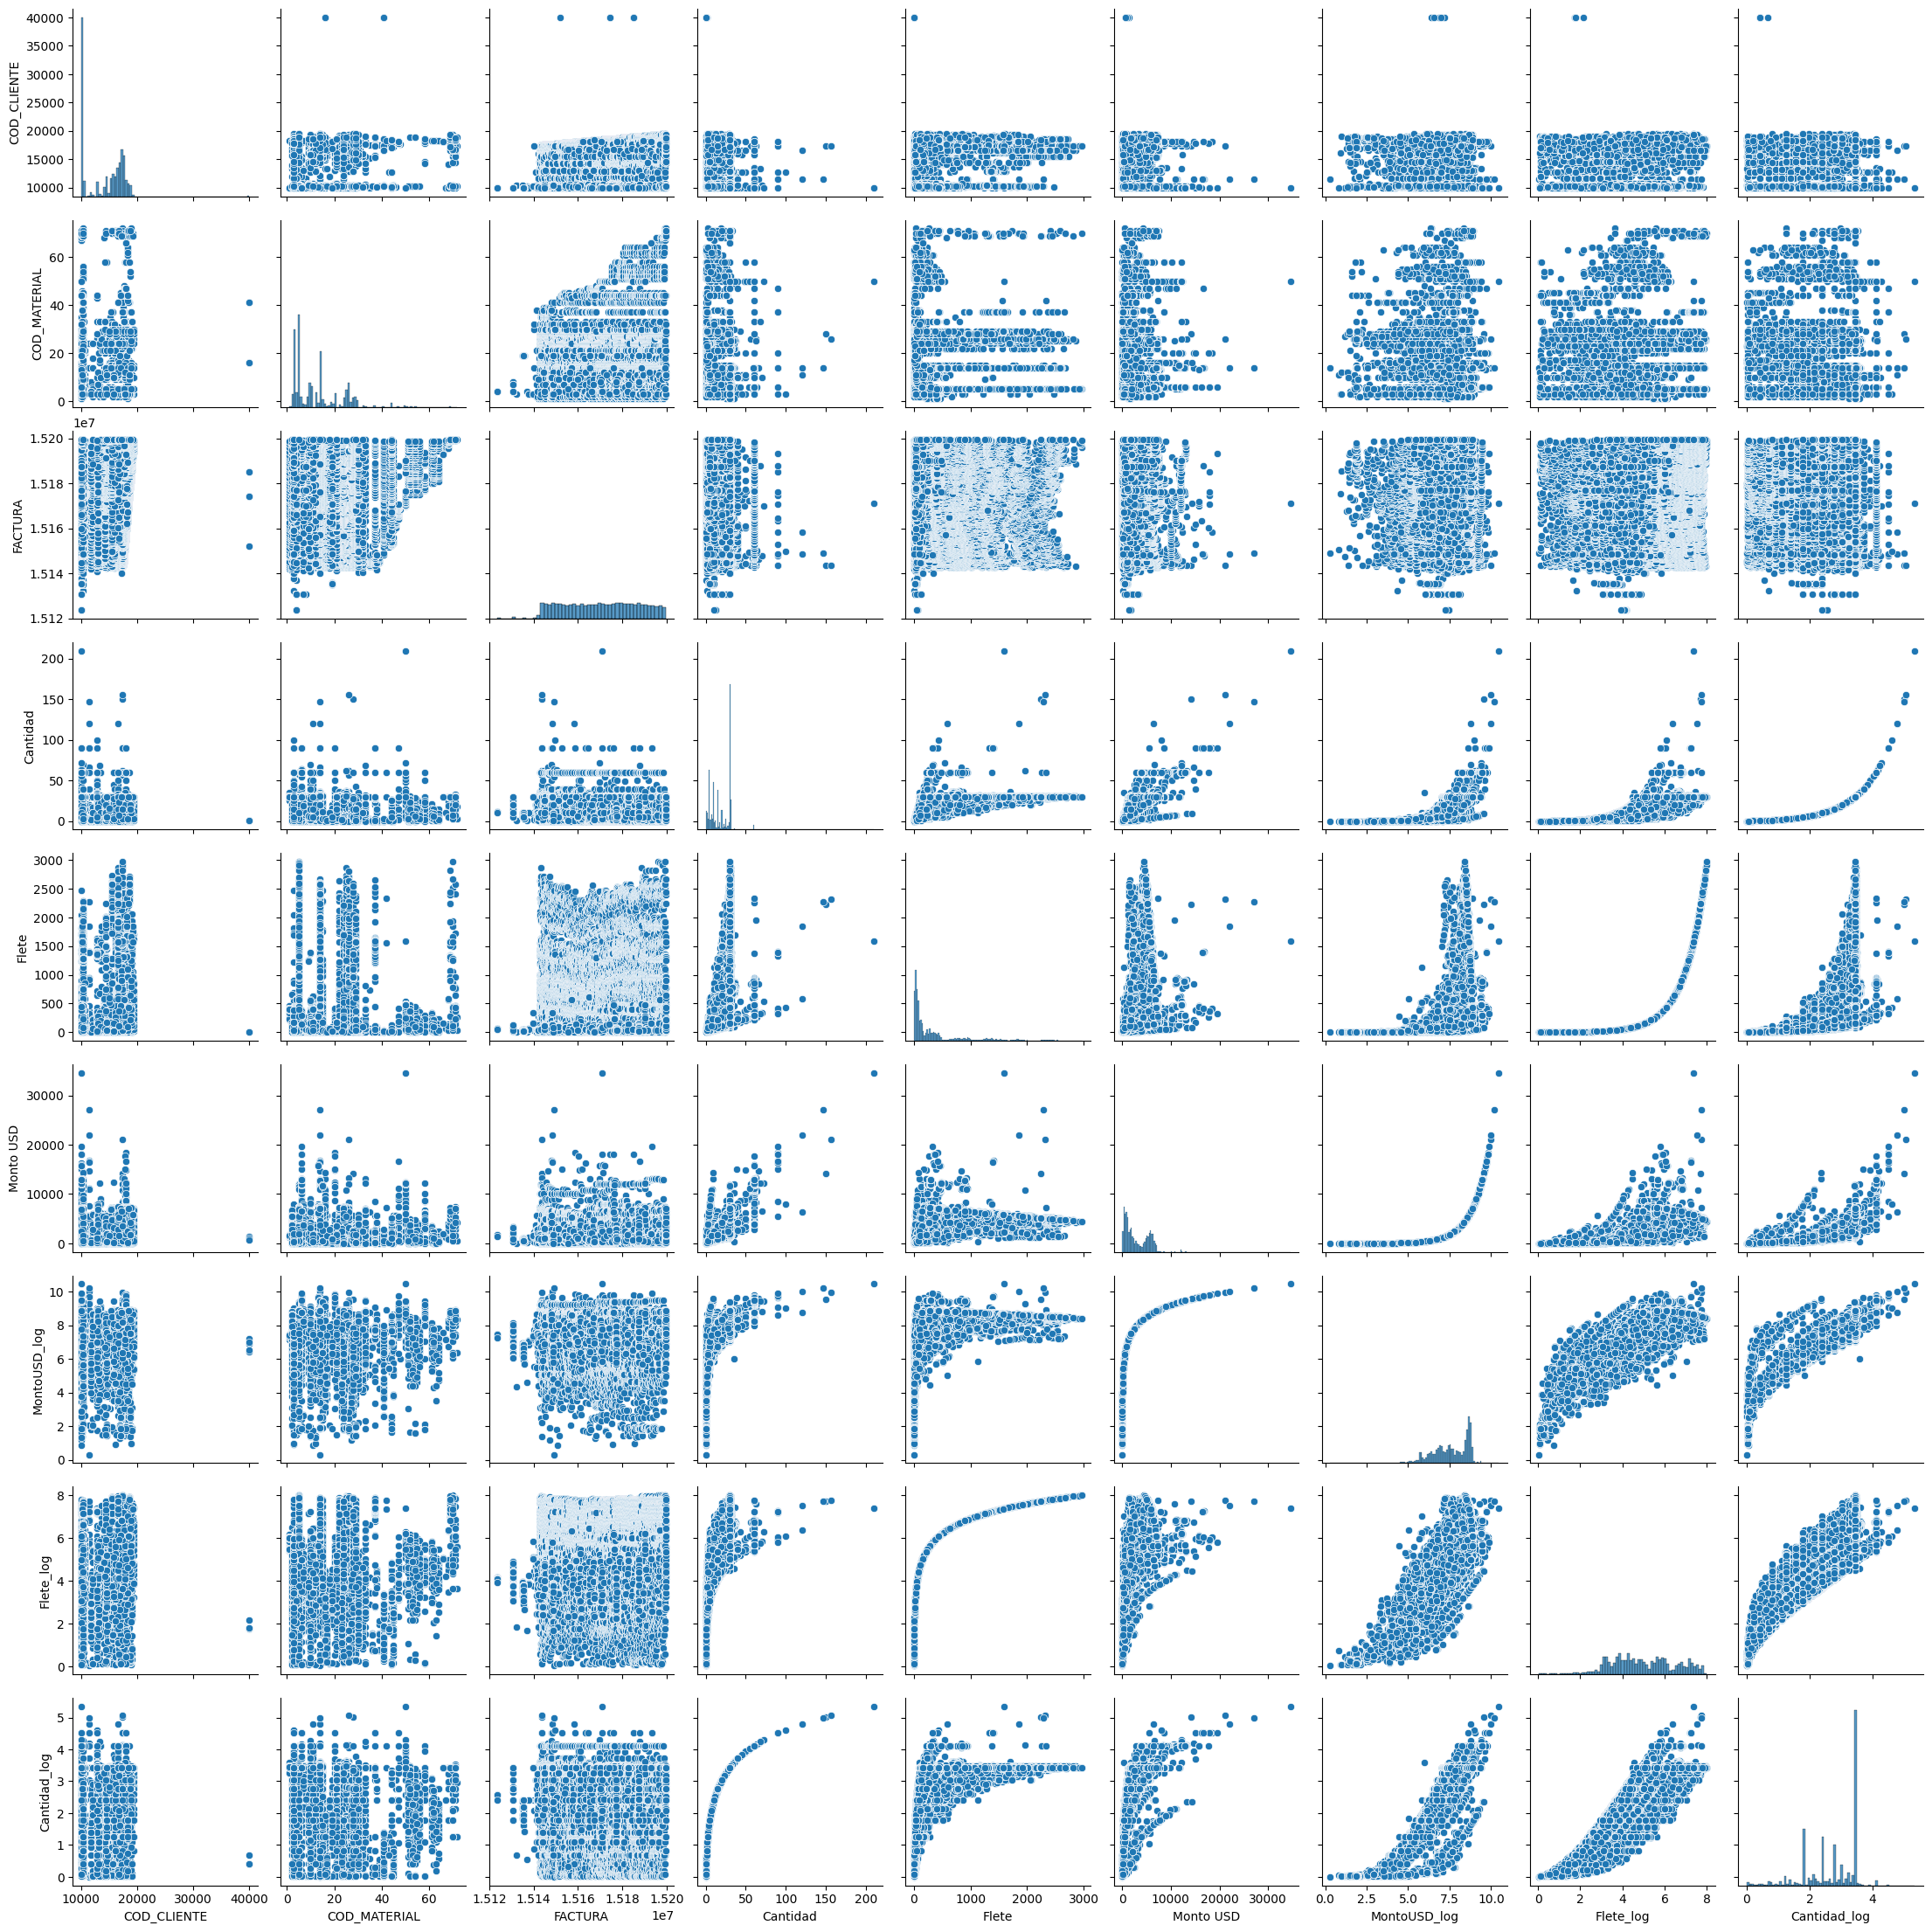

In [42]:
sns.pairplot(df)

Notamos como la aplicacion logaritmica ayudo a que esten mucho mas correlacionadas las variables

In [43]:
lista_completa=list(df.select_dtypes(include=["float64","float32"]))

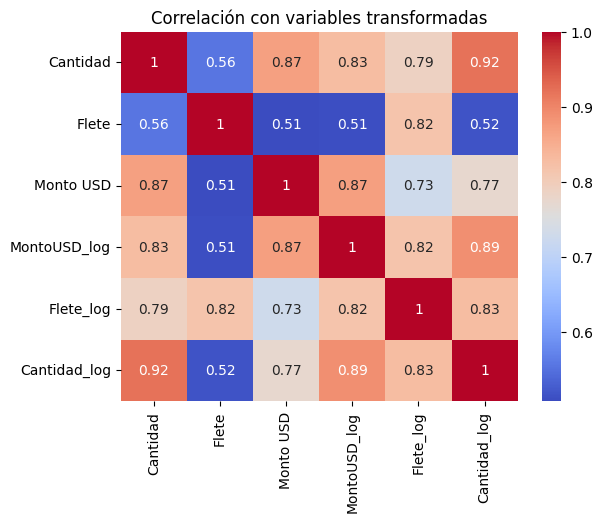

In [44]:

sns.heatmap(df[lista_completa].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación con variables transformadas")
plt.show()


Nos concentramos en las variables logaritimas que son las que importan en nuestra ocasion 

In [45]:
df.columns

Index(['FECHA_FACTURA', 'COD_CLIENTE', 'SECTOR_CLIENTE', 'RUBRO_CLIENTE',
       'COD_MATERIAL', 'COD_MARCA', 'REGION', 'PROVINCIA', 'DISTRITO',
       'CIUDAD', 'CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD', 'MontoUSD_log',
       'Flete_log', 'Cantidad_log'],
      dtype='object')

Procederemos a borrar todas aaquellas variables que analizamos en el EDA y notamos que no impactan en el target

In [46]:
df.drop(columns=["CONDICION_PAGO","FECHA_FACTURA","COD_CLIENTE","Cantidad","Flete","Monto USD","UNIDAD_MEDIDA","CIUDAD","DISTRITO","PROVINCIA","REGION","RUBRO_CLIENTE","COD_MATERIAL","SECTOR_CLIENTE","FACTURA"],inplace=True)
df.head()

COD_MARCA CENTRO_DESPACHO  MontoUSD_log  Flete_log  Cantidad_log
0     Otros               A      7.365984   5.639528      3.466048
1         B               B      7.322616   3.952013      2.484907
2         B               B      7.082238   3.859255      2.397895
3         B               B      7.143618   3.859255      2.397895
4         B               B      6.995537   4.679535      3.044522

In [47]:
df["COD_MARCA"].unique()

array(['Otros', 'B', 'C'], dtype=object)

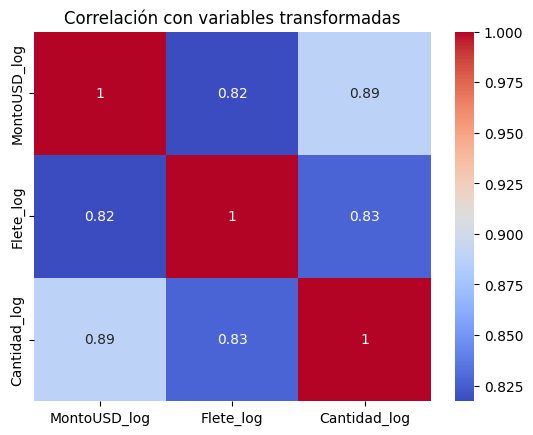

In [48]:

sns.heatmap(df[["MontoUSD_log","Flete_log","Cantidad_log"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación con variables transformadas")
plt.show()


Notamos que la variable fletelog y cantidadlog tienen muy buena relacion con el target MontoUSD_Log pero , estas variables estan muy relacionadas tambien, existe multicolinealidad , lo cual optaremos por quedarnos con la variable Cantidad ya que representa mas que la variable flete, ademas que el flete es una derivacion de la cantidad

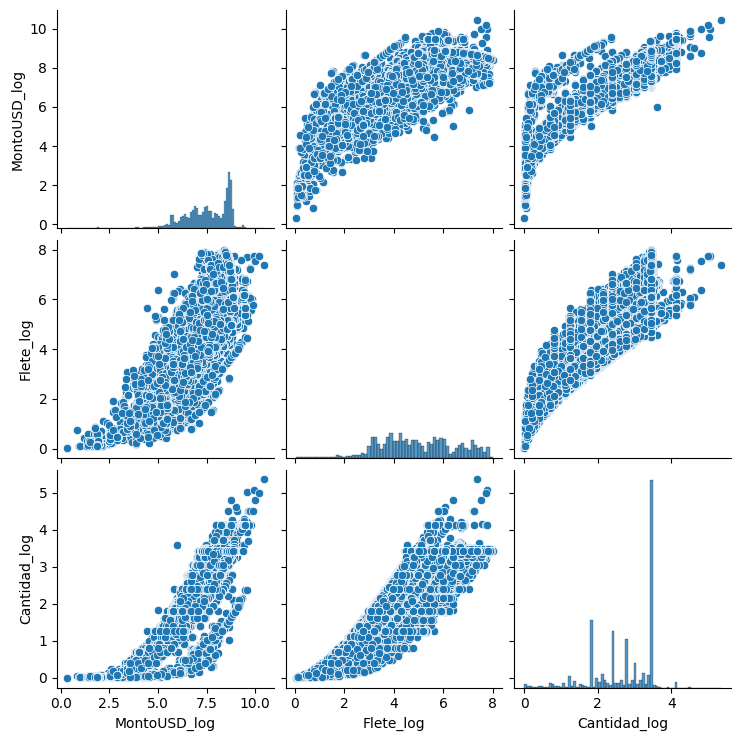

In [49]:
sns.pairplot(df)

In [50]:
df.drop(columns=["Flete_log"],inplace=True)

In [51]:
df.dropna(inplace=True)

## Encoding (Dummy)

Proceremos a convertir a valores numericos, las variables cuantitativas , ya que el modelo solo admite entradas numericas

In [52]:
df_encoded = pd.get_dummies(df, columns=['COD_MARCA', 'CENTRO_DESPACHO'], drop_first=True)
df_encoded.head()


MontoUSD_log  Cantidad_log  COD_MARCA_C  COD_MARCA_Otros  CENTRO_DESPACHO_B
0      7.365984      3.466048        False             True              False
1      7.322616      2.484907        False            False               True
2      7.082238      2.397895        False            False               True
3      7.143618      2.397895        False            False               True
4      6.995537      3.044522        False            False               True

## Construción del modelo (Regresión o Clasificación)

Como sabemos, cuando usamos modelos lineales, estos son sensibles a numeros grandes ya que le darian mucha importancia. Por lo tanto , se escalaria los datos

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [54]:
X = df_encoded.drop(columns=["MontoUSD_log"])  # O la variable target que uses
y = df_encoded["MontoUSD_log"]


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Comparacion y evaluacion de modelos lineales

In [57]:
modelos = {
    "LinearRegression": LinearRegression(),
    "RidgeCV": RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5),
    "LassoCV": LassoCV(alphas=np.logspace(-4, 4, 100), cv=5, max_iter=10000),
    "ElasticNetCV": ElasticNetCV(alphas=np.logspace(-4, 4, 100),
                                 l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, max_iter=10000)
}

In [58]:
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{nombre} - R2 promedio (CV): {np.mean(scores):.4f} | Std: {np.std(scores):.4f}")

LinearRegression - R2 promedio (CV): 0.8440 | Std: 0.0037
RidgeCV - R2 promedio (CV): 0.8440 | Std: 0.0037
LassoCV - R2 promedio (CV): 0.8440 | Std: 0.0037
ElasticNetCV - R2 promedio (CV): 0.8440 | Std: 0.0037


In [59]:
for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"{nombre} → R2 test: {r2:.4f} | MSE test: {mse:.4f}")


LinearRegression → R2 test: 0.8469 | MSE test: 0.2034
RidgeCV → R2 test: 0.8469 | MSE test: 0.2034
LassoCV → R2 test: 0.8469 | MSE test: 0.2034
ElasticNetCV → R2 test: 0.8469 | MSE test: 0.2034


Como resultado final , notamos que el modelo no tiene overfitting, el r2 del train es similar al de test , y notamos que tiene un buen R2 de 0.8469, con cualquiera de los 4 modelos

## Comparacion y evaluacion de modelos  no lineales

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [61]:
param_grid_tree = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [62]:
dt = DecisionTreeRegressor(random_state=42)
grid_tree = GridSearchCV(dt, param_grid_tree, cv=5, scoring='r2', n_jobs=-1)
grid_tree.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros - Árbol de Decisión:")
print(grid_tree.best_params_)
print(f"R2 en CV: {grid_tree.best_score_:.4f}")

Mejores hiperparámetros - Árbol de Decisión:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
R2 en CV: 0.8958


In [63]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [64]:
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros - Random Forest:")
print(grid_rf.best_params_)
print(f"R2 en CV: {grid_rf.best_score_:.4f}")


Mejores hiperparámetros - Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
R2 en CV: 0.8965


Notamos que aqui subio notablemente el R2 comparandolos con los modelos lineales, y es ligeramente mejor que el arbol de decision por unos decimales.

## Conclusiones

### Resultados Principales

#### Comparación de Modelos
- **Modelos Lineales:** Los cuatro modelos lineales (LinearRegression, RidgeCV, LassoCV, ElasticNetCV) mostraron desempeño idéntico con R² = 0.8469 y MSE = 0.2034
- **Modelos No Lineales:** Superaron significativamente a los lineales:
  - Árbol de Decisión: R² = 0.8958
  - **Random Forest: R² = 0.8965 (MEJOR MODELO)**

#### Observaciones Clave
1. Los modelos no muestran signos de sobreajuste (R² train ≈ R² test)
2. La transformación logarítmica de la variable objetivo fue efectiva
3. Las variables categóricas codificadas aportan valor predictivo significativo
4. Random Forest demostró ser el modelo más robusto y preciso

###  Recomendaciones de Negocio

#### Para RetailPlus:
1. **Implementar el modelo Random Forest** como herramienta de predicción de ventas
2. **Utilizar las predicciones para:**
   - Optimizar inventarios por región y sector cliente
   - Mejorar negociaciones de condiciones de pago
   - Identificar oportunidades de crecimiento por segmento